#DATS 2103: Final Project – Working with Real-World Data
By Christina Salemme
Due: Wednesday, December 12, at 6 PM


Below is the code used for downloading and importing proper packages for this assignment.

In [3]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate
!pip install numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 lxml==5.2.2 scikit-learn==1.5.0 joblib==1.4.2 statsmodels==0.14.2 lifelines==0.28.0 pygam==0.9.1 l0bnb==1.0.0 torch==2.3.0 torchvision==0.18.0 pytorch-lightning==2.2.5 torchinfo==1.8.0 torchmetrics==1.4.0.post0 ISLP==0.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 24.6 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 2083ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.6.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

##Question 1: Preparing a Dataset in the Real World

This code does not need to be run, it simply shows my work progression to obtain the full data frame in csv format that I desired. In 1.2 I essentially put the option to upload the file from the folder I am going to submit. I want to cover all my bases when showing my work for this project.

###1.1 Downloading Data from BLS (Do Not Need to Run)

I am not only downloading the data, which I am going to include in a zip file, I am also going to calculate annual averages so I can work with the data over time instead of on a monthly basis.

####Civilian Labor Force Level (Seasonally Adjusted)

In [ ]:
uploaded = files.upload()
Civillian_Labor_Force_Level = pd.read_excel("Civilian Labor Force Level.xlsx")
print(Civillian_Labor_Force_Level)

Saving Civilian Labor Force Level.xlsx to Civilian Labor Force Level (1).xlsx
    Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0   1974   91199   91485   91453   91287   91596   91868   92212   92059   
1   1975   93128   92776   93165   93399   93884   93575   94021   94162   
2   1976   94934   94998   95215   95746   95847   95885   96583   96741   
3   1977   97208   97785   98115   98330   98665   99093   98913   99366   
4   1978  100873  100837  101092  101574  101896  102371  102399  102511   
5   1979  104057  104502  104589  104172  104171  104638  105002  105096   
6   1980  106562  106697  106442  106591  106929  106780  107159  107105   
7   1981  108026  108242  108553  108925  109222  108396  108556  108725   
8   1982  109089  109467  109567  109820  110451  110081  110342  110514   
9   1983  110695  110634  110587  110828  110796  111879  111756  112231   
10  1984  112209  112615  112713  113098  113649  113817  113972  113682   
11  1985  

In [ ]:
Civillian_Labor_Force_Level.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Civillian_Labor_Force_Level['Civillian Labor Force Lvl Annual Average'] = Civillian_Labor_Force_Level[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Civillian_Labor_Force_Level.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Civillian Labor Force Lvl Annual Average
0,1974,91199,91485,91453,91287,91596,91868,92212,92059,92488,92518,92766.0,92780.0,91975.916667
1,1975,93128,92776,93165,93399,93884,93575,94021,94162,94202,94267,94250.0,94409.0,93769.833333
2,1976,94934,94998,95215,95746,95847,95885,96583,96741,96553,96704,97254.0,97348.0,96150.666667
3,1977,97208,97785,98115,98330,98665,99093,98913,99366,99453,99815,100576.0,100491.0,98984.166667
4,1978,100873,100837,101092,101574,101896,102371,102399,102511,102795,103080,103562.0,103809.0,102233.250000


####Employment Level (Seasonally Adjusted)

In [ ]:
uploaded = files.upload()
Employment_Level = pd.read_excel("Employment Level.xlsx")
print(Employment_Level)

Saving Employment Level.xlsx to Employment Level.xlsx
    Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0   1974   86555   86754   86819   86669   86891   86941   87149   87037   
1   1975   85627   85256   85187   85189   85451   85355   85894   86234   
2   1976   87400   87672   87985   88416   88794   88563   89093   89223   
3   1977   89928   90342   90808   91271   91754   91959   92084   92441   
4   1978   94384   94519   94755   95394   95769   96343   96090   96431   
5   1979   97948   98329   98480   98103   98331   98679   99006   98776   
6   1980   99879   99995   99713   99233   98945   98682   98796   98824   
7   1981   99955  100191  100571  101056  101048  100298  100693  100689   
8   1982   99692   99762   99672   99576  100116   99543   99493   99633   
9   1983   99161   99089   99179   99560   99642  100633  101208  101608   
10  1984  103201  103824  103967  104336  105193  105591  105435  105163   
11  1985  106302  106555  106989  

In [ ]:
Employment_Level.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Employment_Level['Employment Lvl Annual Average'] = Employment_Level[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Employment_Level.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Employment Lvl Annual Average
0,1974,86555,86754,86819,86669,86891,86941,87149,87037,87051,86995,86626.0,86144.0,86802.583333
1,1975,85627,85256,85187,85189,85451,85355,85894,86234,86279,86370,86456.0,86665.0,85830.250000
2,1976,87400,87672,87985,88416,88794,88563,89093,89223,89173,89274,89634.0,89803.0,88752.500000
3,1977,89928,90342,90808,91271,91754,91959,92084,92441,92702,93052,93761.0,94105.0,92017.250000
4,1978,94384,94519,94755,95394,95769,96343,96090,96431,96670,97133,97485.0,97581.0,96046.166667


####Unemployment Level (Seasonally Adjusted)

In [ ]:
uploaded = files.upload()
Unemployment_Level = pd.read_excel("Unemployment Level.xlsx")
print(Unemployment_Level)

Saving Unemployment Level.xlsx to Unemployment Level.xlsx
    Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0   1974   4644   4731   4634   4618   4705   4927   5063   5022   5437   
1   1975   7501   7520   7978   8210   8433   8220   8127   7928   7923   
2   1976   7534   7326   7230   7330   7053   7322   7490   7518   7380   
3   1977   7280   7443   7307   7059   6911   7134   6829   6925   6751   
4   1978   6489   6318   6337   6180   6127   6028   6309   6080   6125   
5   1979   6109   6173   6109   6069   5840   5959   5996   6320   6190   
6   1980   6683   6702   6729   7358   7984   8098   8363   8281   8021   
7   1981   8071   8051   7982   7869   8174   8098   7863   8036   8230   
8   1982   9397   9705   9895  10244  10335  10538  10849  10881  11217   
9   1983  11534  11545  11408  11268  11154  11246  10548  10623  10282   
10  1984   9008   8791   8746   8762   8456   8226   8537   8519   8367   
11  1985   8423   8321   8339   8395   830

In [ ]:
Unemployment_Level.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Unemployment_Level['Unemployment Lvl Annual Average'] = Employment_Level[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Unemployment_Level.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unemployment Lvl Annual Average
0,1974,4644,4731,4634,4618,4705,4927,5063,5022,5437,5523,6140.0,6636.0,86802.583333
1,1975,7501,7520,7978,8210,8433,8220,8127,7928,7923,7897,7794.0,7744.0,85830.250000
2,1976,7534,7326,7230,7330,7053,7322,7490,7518,7380,7430,7620.0,7545.0,88752.500000
3,1977,7280,7443,7307,7059,6911,7134,6829,6925,6751,6763,6815.0,6386.0,92017.250000
4,1978,6489,6318,6337,6180,6127,6028,6309,6080,6125,5947,6077.0,6228.0,96046.166667


####Unemployment Rate (Seasonally Adjusted)


In [ ]:
uploaded = files.upload()
Unemployment_Rate = pd.read_excel("Unemployment Rate.xlsx")
print(Unemployment_Rate)

Saving Unemployment Rate.xlsx to Unemployment Rate.xlsx
    Year   Jan   Feb   Mar   Apr   May   Jun   Jul  Aug   Sep   Oct   Nov  \
0   1974   5.1   5.2   5.1   5.1   5.1   5.4   5.5  5.5   5.9   6.0   6.6   
1   1975   8.1   8.1   8.6   8.8   9.0   8.8   8.6  8.4   8.4   8.4   8.3   
2   1976   7.9   7.7   7.6   7.7   7.4   7.6   7.8  7.8   7.6   7.7   7.8   
3   1977   7.5   7.6   7.4   7.2   7.0   7.2   6.9  7.0   6.8   6.8   6.8   
4   1978   6.4   6.3   6.3   6.1   6.0   5.9   6.2  5.9   6.0   5.8   5.9   
5   1979   5.9   5.9   5.8   5.8   5.6   5.7   5.7  6.0   5.9   6.0   5.9   
6   1980   6.3   6.3   6.3   6.9   7.5   7.6   7.8  7.7   7.5   7.5   7.5   
7   1981   7.5   7.4   7.4   7.2   7.5   7.5   7.2  7.4   7.6   7.9   8.3   
8   1982   8.6   8.9   9.0   9.3   9.4   9.6   9.8  9.8  10.1  10.4  10.8   
9   1983  10.4  10.4  10.3  10.2  10.1  10.1   9.4  9.5   9.2   8.8   8.5   
10  1984   8.0   7.8   7.8   7.7   7.4   7.2   7.5  7.5   7.3   7.4   7.2   
11  1985   7.3   7.2

In [ ]:
Unemployment_Rate.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Unemployment_Rate['Unemployment Rate Annual Average'] = Unemployment_Rate[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Unemployment_Rate.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unemployment Rate Annual Average
0,1974,5.1,5.2,5.1,5.1,5.1,5.4,5.5,5.5,5.9,6.0,6.6,7.2,5.641667
1,1975,8.1,8.1,8.6,8.8,9.0,8.8,8.6,8.4,8.4,8.4,8.3,8.2,8.475000
2,1976,7.9,7.7,7.6,7.7,7.4,7.6,7.8,7.8,7.6,7.7,7.8,7.8,7.700000
3,1977,7.5,7.6,7.4,7.2,7.0,7.2,6.9,7.0,6.8,6.8,6.8,6.4,7.050000
4,1978,6.4,6.3,6.3,6.1,6.0,5.9,6.2,5.9,6.0,5.8,5.9,6.0,6.066667


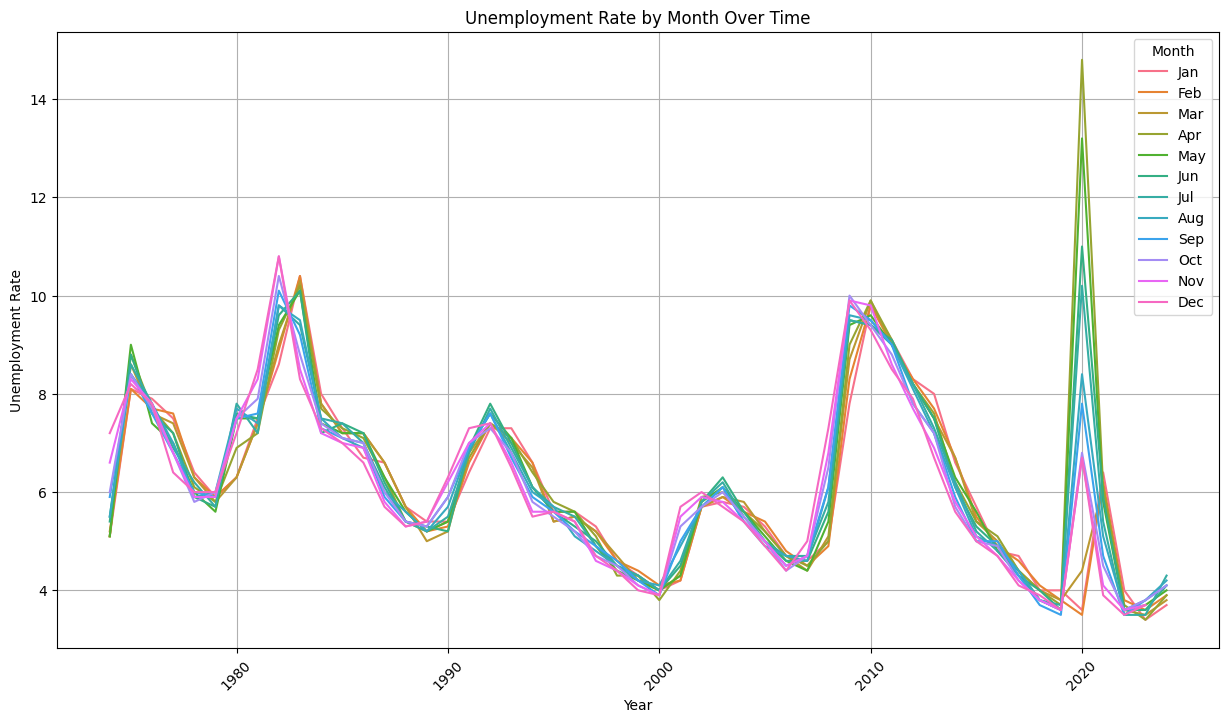

In [ ]:
melted_unemployment = Unemployment_Rate.melt(id_vars='Year',
                                            value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                            var_name='Month',
                                            value_name='Unemployment Rate')
plt.figure(figsize=(15, 8))
sns.lineplot(data=melted_unemployment, x='Year', y='Unemployment Rate', hue='Month')
plt.title('Unemployment Rate by Month Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.grid(True)
plt.show()

####Number of Employees, Thousands, Total Nonfarm, Seasonally Adjusted

In [ ]:
uploaded = files.upload()
Number_of_Employees_Thousands = pd.read_excel("Number of Employees (Thousands).xlsx")
print(Number_of_Employees_Thousands)

Saving Number of Employees (Thousands).xlsx to Number of Employees (Thousands).xlsx
    Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0   1974   78100   78254   78296   78382   78549   78604   78636   78619   
1   1975   77293   76918   76648   76460   76624   76521   76770   77153   
2   1976   78503   78816   79048   79292   79312   79376   79547   79704   
3   1977   80690   80988   81391   81728   82088   82488   82834   83075   
4   1978   84594   84948   85460   86162   86509   86950   87204   87483   
5   1979   88808   89055   89479   89417   89789   90108   90217   90300   
6   1980   90800   90883   90994   90849   90420   90101   89840   90099   
7   1981   91033   91105   91210   91283   91296   91490   91601   91565   
8   1982   90565   90563   90434   90150   90107   89865   89521   89363   
9   1983   88990   88917   89090   89364   89644   90021   90437   90129   
10  1984   92673   93157   93429   93792   94098   94479   94789   95032   
11  

In [ ]:
Number_of_Employees_Thousands.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Number_of_Employees_Thousands['Number of Employees Thousands Annual Average'] = Number_of_Employees_Thousands[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Number_of_Employees_Thousands.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Number of Employees Thousands Annual Average
0,1974,78100,78254,78296,78382,78549,78604,78636,78619,78610,78630,78265.0,77652.0,78383.083333
1,1975,77293,76918,76648,76460,76624,76521,76770,77153,77228,77540,77685.0,78017.0,77071.416667
2,1976,78503,78816,79048,79292,79312,79376,79547,79704,79892,79911,80240.0,80448.0,79507.416667
3,1977,80690,80988,81391,81728,82088,82488,82834,83075,83532,83800,84173.0,84410.0,82599.750000
4,1978,84594,84948,85460,86162,86509,86950,87204,87483,87621,87956,88391.0,88671.0,86829.083333


####Average Weekly Hours of Employees (Seasonally Adjusted)

#####All Employees


In [ ]:
uploaded = files.upload()
Average_Weekly_Hours_of_Employees = pd.read_excel("Average Weekly Hours of Employees.xlsx")
print(Average_Weekly_Hours_of_Employees)

Saving Average Weekly Hours of Employees.xlsx to Average Weekly Hours of Employees.xlsx
    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0   2006   NaN   NaN  34.2  34.3  34.3  34.4  34.3  34.3  34.4  34.3  34.3   
1   2007  34.3  34.3  34.4  34.4  34.4  34.5  34.4  34.4  34.4  34.3  34.4   
2   2008  34.4  34.3  34.4  34.4  34.4  34.4  34.3  34.3  34.2  34.3  34.1   
3   2009  34.0  34.0  33.8  33.8  33.8  33.7  33.8  33.8  33.9  33.8  33.9   
4   2010  34.0  33.8  34.0  34.1  34.1  34.1  34.2  34.2  34.3  34.3  34.3   
5   2011  34.2  34.3  34.3  34.4  34.4  34.4  34.4  34.3  34.4  34.5  34.4   
6   2012  34.5  34.5  34.5  34.4  34.4  34.4  34.4  34.4  34.4  34.3  34.4   
7   2013  34.4  34.5  34.5  34.4  34.5  34.5  34.4  34.5  34.4  34.4  34.4   
8   2014  34.4  34.3  34.5  34.5  34.5  34.5  34.5  34.6  34.5  34.5  34.6   
9   2015  34.5  34.6  34.5  34.5  34.5  34.5  34.5  34.6  34.5  34.5  34.5   
10  2016  34.6  34.4  34.4  34.4  34.4  34.4  34.4  34

In [ ]:
Average_Weekly_Hours_of_Employees.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Average_Weekly_Hours_of_Employees['Weekly Hours All Employees Annual Average'] = Average_Weekly_Hours_of_Employees[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Average_Weekly_Hours_of_Employees.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Weekly Hours All Employees Annual Average
0,2006,NaN,NaN,34.2,34.3,34.3,34.4,34.3,34.3,34.4,34.3,34.3,34.5,34.330000
1,2007,34.3,34.3,34.4,34.4,34.4,34.5,34.4,34.4,34.4,34.3,34.4,34.4,34.383333
2,2008,34.4,34.3,34.4,34.4,34.4,34.4,34.3,34.3,34.2,34.3,34.1,33.9,34.283333
3,2009,34.0,34.0,33.8,33.8,33.8,33.7,33.8,33.8,33.9,33.8,33.9,33.9,33.850000
4,2010,34.0,33.8,34.0,34.1,34.1,34.1,34.2,34.2,34.3,34.3,34.3,34.3,34.141667


#####Production and Nonsupervisory Employees

In [ ]:
uploaded = files.upload()
Average_Weekly_Hours_of_Employees_Production_and_Nonsupervisory_Employees = pd.read_excel("Average of Weekly Hours of Prod and Nonsupervisory Employees.xlsx")
print(Average_Weekly_Hours_of_Employees_Production_and_Nonsupervisory_Employees)

Saving Average of Weekly Hours of Prod and Nonsupervisory Employees.xlsx to Average of Weekly Hours of Prod and Nonsupervisory Employees.xlsx
    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0   1974  36.6  36.6  36.6  36.4  36.6  36.5  36.5  36.5  36.4  36.3  36.1   
1   1975  36.0  35.9  35.7  35.8  35.9  35.9  35.9  36.1  36.1  36.1  36.1   
2   1976  36.3  36.3  36.1  36.0  36.2  36.1  36.1  36.0  36.1  35.9  35.9   
3   1977  35.6  36.0  35.9  36.0  36.0  36.0  35.9  35.9  35.8  36.0  35.9   
4   1978  35.3  35.6  35.8  35.8  35.8  35.9  35.9  35.8  35.7  35.8  35.7   
5   1979  35.6  35.7  35.8  35.3  35.6  35.6  35.6  35.6  35.6  35.6  35.6   
6   1980  35.4  35.4  35.3  35.2  35.1  35.0  34.9  35.1  35.1  35.2  35.3   
7   1981  35.4  35.2  35.3  35.3  35.3  35.2  35.2  35.2  35.0  35.0  35.1   
8   1982  34.1  35.1  34.9  34.8  34.8  34.8  34.8  34.7  34.8  34.6  34.6   
9   1983  34.9  34.5  34.7  34.8  34.9  34.9  34.9  34.9  35.0  35.2  35.1   


In [ ]:
Average_Weekly_Hours_of_Employees_Production_and_Nonsupervisory_Employees.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Average_Weekly_Hours_of_Employees_Production_and_Nonsupervisory_Employees['Weekly Hours Prod/Nonsup Annual Average'] = Average_Weekly_Hours_of_Employees_Production_and_Nonsupervisory_Employees[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Average_Weekly_Hours_of_Employees_Production_and_Nonsupervisory_Employees.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Weekly Hours Prod/Nonsup Annual Average
0,1974,36.6,36.6,36.6,36.4,36.6,36.5,36.5,36.5,36.4,36.3,36.1,36.1,36.433333
1,1975,36.0,35.9,35.7,35.8,35.9,35.9,35.9,36.1,36.1,36.1,36.1,36.2,35.975000
2,1976,36.3,36.3,36.1,36.0,36.2,36.1,36.1,36.0,36.1,35.9,35.9,35.9,36.075000
3,1977,35.6,36.0,35.9,36.0,36.0,36.0,35.9,35.9,35.8,36.0,35.9,35.8,35.900000
4,1978,35.3,35.6,35.8,35.8,35.8,35.9,35.9,35.8,35.7,35.8,35.7,35.7,35.733333


####Average Hourly Earnings (Seasonally Adjusted)

#####All Employees

In [ ]:
uploaded = files.upload()
Average_Hourly_Earnings = pd.read_excel("Average Hourly Earnings.xlsx")
print(Average_Hourly_Earnings)

Saving Average Hourly Earnings.xlsx to Average Hourly Earnings.xlsx
    Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0   2006    NaN    NaN  20.05  20.15  20.13  20.23  20.29  20.32  20.41   
1   2007  20.59  20.68  20.73  20.78  20.84  20.95  20.95  21.00  21.04   
2   2008  21.20  21.26  21.36  21.38  21.47  21.51  21.60  21.70  21.72   
3   2009  21.96  21.99  22.06  22.09  22.11  22.14  22.18  22.23  22.27   
4   2010  22.41  22.45  22.46  22.49  22.53  22.53  22.59  22.62  22.67   
5   2011  22.86  22.87  22.87  22.91  22.98  23.01  23.10  23.07  23.12   
6   2012  23.25  23.28  23.36  23.39  23.40  23.46  23.50  23.48  23.57   
7   2013  23.75  23.78  23.80  23.87  23.89  23.96  23.98  24.02  24.06   
8   2014  24.23  24.33  24.32  24.34  24.40  24.46  24.48  24.54  24.55   
9   2015  24.75  24.79  24.86  24.89  24.97  24.97  25.00  25.09  25.11   
10  2016  25.38  25.38  25.45  25.53  25.58  25.62  25.69  25.72  25.77   
11  2017  26.00  26.07  26.11  2

In [ ]:
Average_Hourly_Earnings.columns

Index(['Year',  'Jan',  'Feb',  'Mar',  'Apr',  'May',  'Jun',  'Jul',  'Aug',
        'Sep',  'Oct',  'Nov',  'Dec',      9],
      dtype='object')

In [ ]:
Average_Hourly_Earnings['Hourly Earnings Annual Average'] = Average_Hourly_Earnings[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1  )
Average_Hourly_Earnings.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,9,Hourly Earnings Annual Average
0,2006,NaN,NaN,20.05,20.15,20.13,20.23,20.29,20.32,20.41,20.43,20.49,20.57,NaN,20.307000
1,2007,20.59,20.68,20.73,20.78,20.84,20.95,20.95,21.00,21.04,21.06,21.12,21.17,NaN,20.909167
2,2008,21.20,21.26,21.36,21.38,21.47,21.51,21.60,21.70,21.72,21.76,21.87,21.94,NaN,21.564167
3,2009,21.96,21.99,22.06,22.09,22.11,22.14,22.18,22.23,22.27,22.30,22.35,22.36,NaN,22.170000
4,2010,22.41,22.45,22.46,22.49,22.53,22.53,22.59,22.62,22.67,22.74,22.73,22.76,NaN,22.581667


#####Production and Nonsupervisory Employees

In [ ]:
uploaded = files.upload()
Average_Hourly_Earnings_Production_and_Nonsupervisory_Employees = pd.read_excel("Average Hourly Earnings of Prod and Nonsupervisory Employees.xlsx")
print(Average_Hourly_Earnings_Production_and_Nonsupervisory_Employees)

Saving Average Hourly Earnings of Prod and Nonsupervisory Employees.xlsx to Average Hourly Earnings of Prod and Nonsupervisory Employees.xlsx
    Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0   1974   4.27   4.29   4.32   4.33   4.40   4.44   4.45   4.49   4.53   
1   1975   4.61   4.64   4.67   4.67   4.69   4.72   4.74   4.78   4.79   
2   1976   4.90   4.93   4.95   4.98   5.01   5.03   5.06   5.11   5.14   
3   1977   5.26   5.30   5.32   5.36   5.40   5.42   5.46   5.48   5.51   
4   1978   5.66   5.69   5.73   5.79   5.82   5.86   5.90   5.92   5.97   
5   1979   6.13   6.18   6.22   6.21   6.27   6.32   6.36   6.40   6.45   
6   1980   6.57   6.63   6.69   6.72   6.76   6.82   6.86   6.91   6.95   
7   1981   7.18   7.23   7.29   7.33   7.37   7.41   7.45   7.52   7.56   
8   1982   7.72   7.72   7.75   7.77   7.84   7.85   7.90   7.94   7.94   
9   1983   8.06   8.09   8.10   8.13   8.17   8.19   8.22   8.20   8.27   
10  1984   8.38   8.38   8.41   8

In [ ]:
Average_Hourly_Earnings_Production_and_Nonsupervisory_Employees.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
Average_Hourly_Earnings_Production_and_Nonsupervisory_Employees['Hourly Earnings Prod/Nonsup Annual Average'] = Average_Hourly_Earnings_Production_and_Nonsupervisory_Employees[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Average_Hourly_Earnings_Production_and_Nonsupervisory_Employees.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Hourly Earnings Prod/Nonsup Annual Average
0,1974,4.27,4.29,4.32,4.33,4.40,4.44,4.45,4.49,4.53,4.56,4.57,4.60,4.437500
1,1975,4.61,4.64,4.67,4.67,4.69,4.72,4.74,4.78,4.79,4.82,4.86,4.87,4.738333
2,1976,4.90,4.93,4.95,4.98,5.01,5.03,5.06,5.11,5.14,5.16,5.21,5.23,5.059167
3,1977,5.26,5.30,5.32,5.36,5.40,5.42,5.46,5.48,5.51,5.55,5.58,5.61,5.437500
4,1978,5.66,5.69,5.73,5.79,5.82,5.86,5.90,5.92,5.97,6.02,6.05,6.10,5.875833


####Labor Productivity (Seasonally Adjusted)
(	% Change from previous quarter)

In [ ]:
uploaded = files.upload()
Labor_Productivity = pd.read_excel("Labor Productivity.xlsx")
print(Labor_Productivity)

Saving Labor Productivity.xlsx to Labor Productivity.xlsx
    Year  Qtr1  Qtr2  Qtr3  Qtr4
0   1974  -1.0  -1.2  -4.0   3.6
1   1975   3.0   6.5   5.0   0.4
2   1976   6.1   3.7   0.9   1.2
3   1977   2.6   1.6   4.3  -5.0
4   1978   0.2   8.2   0.2   2.7
5   1979  -3.6  -0.7  -0.5  -0.5
6   1980   1.9  -4.1   1.6   4.1
7   1981   6.3  -5.1   3.8  -4.2
8   1982  -2.0   0.1   0.8   3.6
9   1983   5.5   9.1   1.0   2.3
10  1984   1.9   2.2   1.7   0.4
11  1985   1.3   1.3   5.2   1.6
12  1986   4.8   3.2   1.7  -0.9
13  1987  -1.9   2.7   0.1   4.1
14  1988   1.5   1.1   0.8   0.4
15  1989   0.7   1.2   1.9   0.0
16  1990   3.8   2.8   1.3  -4.1
17  1991   1.2   6.7   3.5   1.9
18  1992   8.1   3.5   3.6   2.4
19  1993  -3.4  -2.3   1.8   1.6
20  1994   1.1   0.4  -2.2   4.3
21  1995   0.3   1.9   0.0   2.2
22  1996   2.5   3.9   1.5   0.4
23  1997  -0.8   6.1   3.3   1.9
24  1998   3.7   2.1   5.6   3.1
25  1999   5.6   1.5   3.7   6.0
26  2000  -1.6   8.3  -0.3   4.2
27  2001  -2.2   7

In [ ]:
Labor_Productivity.columns

Index(['Year', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'], dtype='object')

In [ ]:
Labor_Productivity['Labor Productivity Annual Average'] = Labor_Productivity[['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4']].mean(axis=1)
Labor_Productivity.head()

,Year,Qtr1,Qtr2,Qtr3,Qtr4,Labor Productivity Annual Average
0,1974,-1.0,-1.2,-4.0,3.6,-0.650
1,1975,3.0,6.5,5.0,0.4,3.725
2,1976,6.1,3.7,0.9,1.2,2.975
3,1977,2.6,1.6,4.3,-5.0,0.875
4,1978,0.2,8.2,0.2,2.7,2.825


####Unit Labor Costs (Seasonally Adjusted)
(	% Change from previous quarter)

In [ ]:
uploaded = files.upload()
Unit_Labor_Costs = pd.read_excel("Unit Labor Costs.xlsx")
print(Unit_Labor_Costs)

Saving Unit Labor Costs.xlsx to Unit Labor Costs.xlsx
    Year  Qtr1  Qtr2  Qtr3  Qtr4
0   1974  10.5  12.1  17.1   7.5
1   1975   9.2   2.1   2.2   6.3
2   1976   1.8   3.9   7.6   7.5
3   1977   5.1   6.7   3.6  12.7
4   1978  10.8  -1.1   7.6   7.5
5   1979  14.8  10.3   9.7  11.0
6   1980   9.6  16.0   8.8   6.7
7   1981   3.9  12.8   5.2  11.4
8   1982  13.2   3.0   5.5   2.4
9   1983  -1.3  -4.7   1.2   2.3
10  1984   2.7   2.0   4.2   2.8
11  1985   3.8   2.5   0.8   6.1
12  1986   1.0   1.5   3.3   6.4
13  1987   3.7   0.2   4.1   0.7
14  1988   5.5   3.8   4.2   2.6
15  1989   0.4   0.5   1.7   5.8
16  1990   3.9   5.1   4.0   7.4
17  1991   1.1   1.1   1.3   3.5
18  1992   2.5   0.3   1.0  -0.2
19  1993   0.5   5.5  -1.6   1.3
20  1994  -3.4   3.0   2.2  -1.1
21  1995   2.1   1.4   2.2   1.1
22  1996   1.9  -0.1   1.6   2.0
23  1997   5.5  -2.2   0.7   5.4
24  1998   3.1   3.0   1.0  -0.8
25  1999   1.6   0.2  -0.2   2.1
26  2000  16.7  -6.7   8.4  -1.8
27  2001  11.7  -5.0  

In [ ]:
Unit_Labor_Costs.columns

Index(['Year', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'], dtype='object')

In [ ]:
Unit_Labor_Costs['Unit Labor Costs Annual Average'] = Unit_Labor_Costs[['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4']].mean(axis=1)
Unit_Labor_Costs.head()

,Year,Qtr1,Qtr2,Qtr3,Qtr4,Unit Labor Costs Annual Average
0,1974,10.5,12.1,17.1,7.5,11.800
1,1975,9.2,2.1,2.2,6.3,4.950
2,1976,1.8,3.9,7.6,7.5,5.200
3,1977,5.1,6.7,3.6,12.7,7.025
4,1978,10.8,-1.1,7.6,7.5,6.200


####Real Hourly Compensation (Seasonally Adjusted)
(% Change from the Previous Quarter)


In [ ]:
uploaded = files.upload()
Real_Hourly_Compensation = pd.read_excel("Real Hourly Compensation.xlsx")
print(Real_Hourly_Compensation)

Saving Real Hourly Compensation.xlsx to Real Hourly Compensation.xlsx
    Year  Qtr1  Qtr2  Qtr3  Qtr4
0   1974  -2.7  -0.3   0.6  -1.3
1   1975   3.3   3.7  -0.9  -0.8
2   1976   3.1   3.9   2.0   2.7
3   1977   0.2   1.2   2.2   1.0
4   1978   4.4  -1.8   0.4   2.1
5   1979   1.1  -1.6  -1.7   0.1
6   1980  -1.4   1.0   0.5   1.2
7   1981  -1.1  -0.6   0.8  -0.4
8   1982   5.7  -1.1  -0.7   1.5
9   1983   1.8  -1.0  -1.6   0.9
10  1984  -0.9   0.6   2.7  -0.1
11  1985   1.6   0.3   3.4   3.8
12  1986   3.8   6.9   2.8   2.8
13  1987  -2.7  -1.3   0.2   1.6
14  1988   4.4   0.6   0.3  -0.7
15  1989  -2.9  -4.3   0.7   2.1
16  1990   1.4   4.2  -1.2  -3.1
17  1991   0.2   5.9   2.4   2.4
18  1992   8.5   1.0   2.1  -0.9
19  1993  -4.8   0.1  -1.4   0.2
20  1994  -3.4   1.2  -3.1   1.2
21  1995   0.0   0.2   0.4   1.2
22  1996   1.3   0.3   1.0  -0.9
23  1997   2.4   2.7   2.3   5.3
24  1998   6.2   4.0   4.8   0.6
25  1999   5.7  -1.3   0.4   5.1
26  2000  10.3  -2.1   4.1  -0.5
27  20

In [ ]:
Real_Hourly_Compensation['Real Hourly Compensation Annual Average'] = Real_Hourly_Compensation[['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4']].mean(axis=1)
Real_Hourly_Compensation.head()

,Year,Qtr1,Qtr2,Qtr3,Qtr4,Real Hourly Compensation Annual Average
0,1974,-2.7,-0.3,0.6,-1.3,-0.925
1,1975,3.3,3.7,-0.9,-0.8,1.325
2,1976,3.1,3.9,2.0,2.7,2.925
3,1977,0.2,1.2,2.2,1.0,1.150
4,1978,4.4,-1.8,0.4,2.1,1.275


####Total Factor Productivity (Not Seasonally Adjusted)

In [ ]:
uploaded = files.upload()
Total_Factor_Productivity = pd.read_excel("Total Factor Productivity.xlsx")
print(Total_Factor_Productivity)

Saving Total Factor Productivity.xlsx to Total Factor Productivity.xlsx
    Year   Annual
0   1987   78.589
1   1988   79.417
2   1989   79.564
3   1990   79.590
4   1991   79.287
5   1992   81.484
6   1993   81.152
7   1994   81.468
8   1995   81.610
9   1996   82.393
10  1997   83.130
11  1998   84.572
12  1999   86.294
13  2000   87.330
14  2001   87.726
15  2002   89.450
16  2003   91.426
17  2004   93.520
18  2005   94.903
19  2006   95.211
20  2007   95.518
21  2008   94.590
22  2009   94.834
23  2010   97.334
24  2011   96.969
25  2012   97.683
26  2013   98.065
27  2014   98.738
28  2015   99.489
29  2016   99.364
30  2017  100.000
31  2018  100.633
32  2019  101.987
33  2020  101.756
34  2021  105.053
35  2022  103.343
36  2023  104.107


In [ ]:
Total_Factor_Productivity.columns

Index(['Year', 'Annual'], dtype='object')

In [ ]:
Total_Factor_Productivity.columns = Total_Factor_Productivity.columns.str.strip()
Total_Factor_Productivity.rename(columns={'Annual': 'Total Factor Productivity Annual Average'}, inplace=True)
Total_Factor_Productivity.head()

,Year,Total Factor Productivity Annual Average
0,1987,78.589
1,1988,79.417
2,1989,79.564
3,1990,79.590
4,1991,79.287


####CPI for All Urban Consumers (Not Seasonally Adjusted)
All items less food and energy in U.S. city average, all urban consumers, not seasonally adjusted

In [ ]:
uploaded = files.upload()
CPI_for_all_Urban_Consumers = pd.read_excel("CPI for all Urban Consumers.xlsx")
print(CPI_for_all_Urban_Consumers)

Saving CPI for all Urban Consumers.xlsx to CPI for all Urban Consumers.xlsx
    Year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0   1974   46.800   47.100   47.500   47.900   48.400   49.000   49.500   
1   1975   52.200   52.600   52.900   53.300   53.500   53.700   54.000   
2   1976   55.700   56.000   56.400   56.700   57.000   57.200   57.600   
3   1977   59.200   59.500   59.900   60.300   60.600   61.000   61.200   
4   1978   63.000   63.200   63.700   64.200   64.700   65.300   65.700   
5   1979   68.400   69.000   69.600   70.200   70.800   71.400   72.000   
6   1980   76.600   77.300   78.300   79.300   80.200   81.100   80.900   
7   1981   85.300   85.700   86.100   86.800   87.800   88.700   89.900   
8   1982   93.200   93.500   93.700   94.500   95.400   96.300   96.700   
9   1983   97.600   97.900   98.100   98.600   98.800   99.100   99.600   
10  1984  102.300  102.600  103.000  103.500  103.900  104.200  104.600   
11  1985  106.900  107.4

In [ ]:
CPI_for_all_Urban_Consumers.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
CPI_for_all_Urban_Consumers['CPI Annual Average'] = CPI_for_all_Urban_Consumers[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
CPI_for_all_Urban_Consumers.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,CPI Annual Average
0,1974,46.8,47.1,47.5,47.9,48.4,49.0,49.5,50.1,50.7,51.3,51.8,52.0,49.341667
1,1975,52.2,52.6,52.9,53.3,53.5,53.7,54.0,54.2,54.6,54.9,55.3,55.5,53.891667
2,1976,55.7,56.0,56.4,56.7,57.0,57.2,57.6,57.9,58.3,58.6,58.9,58.9,57.433333
3,1977,59.2,59.5,59.9,60.3,60.6,61.0,61.2,61.5,61.9,62.1,62.4,62.7,61.025000
4,1978,63.0,63.2,63.7,64.2,64.7,65.3,65.7,66.1,66.8,67.3,67.8,68.0,65.483333


####CPI for Urban Wage Earners and Clerical Workers (Not Seasonally Adjusted)
All items less food and energy in U.S. city average, urban wage earners and clerical workers, not seasonally adjusted



In [ ]:
uploaded = files.upload()
CPI_for_Urban_Wage_Earners_and_Clerical_Workers = pd.read_excel("CPI-W - Copy.xlsx")
print(CPI_for_Urban_Wage_Earners_and_Clerical_Workers)

Saving CPI-W - Copy.xlsx to CPI-W - Copy.xlsx
    Year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0   1974   47.300   47.600   48.000   48.300   48.900   49.500   50.000   
1   1975   52.700   53.100   53.500   53.800   54.000   54.300   54.500   
2   1976   56.300   56.600   56.900   57.200   57.600   57.800   58.100   
3   1977   59.800   60.100   60.500   60.900   61.200   61.600   61.800   
4   1978   63.600   63.900   64.300   64.700   65.300   65.900   66.300   
5   1979   69.000   69.600   70.200   70.800   71.500   72.000   72.600   
6   1980   77.000   77.800   78.700   79.800   80.600   81.600   81.400   
7   1981   85.800   86.200   86.600   87.300   88.300   89.200   90.500   
8   1982   93.600   93.900   94.100   95.000   95.900   96.800   97.300   
9   1983   97.900   98.200   98.700   99.100   99.300   99.500   99.900   
10  1984  101.900  101.800  101.900  102.100  102.700  102.900  103.500   
11  1985  106.100  106.700  107.100  107.400  107.700 

In [ ]:
CPI_for_Urban_Wage_Earners_and_Clerical_Workers.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
CPI_for_Urban_Wage_Earners_and_Clerical_Workers['CPI-W Annual Average'] = CPI_for_Urban_Wage_Earners_and_Clerical_Workers[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
CPI_for_Urban_Wage_Earners_and_Clerical_Workers.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,CPI-W Annual Average
0,1974,47.3,47.6,48.0,48.3,48.9,49.5,50.0,50.6,51.3,51.8,52.3,52.5,49.841667
1,1975,52.7,53.1,53.5,53.8,54.0,54.3,54.5,54.8,55.1,55.5,55.9,56.1,54.441667
2,1976,56.3,56.6,56.9,57.2,57.6,57.8,58.1,58.5,58.9,59.2,59.5,59.5,58.008333
3,1977,59.8,60.1,60.5,60.9,61.2,61.6,61.8,62.1,62.5,62.8,63.1,63.3,61.641667
4,1978,63.6,63.9,64.3,64.7,65.3,65.9,66.3,66.7,67.3,67.9,68.4,68.6,66.075000


####PPI Commodity Data for Final Demand (Seasonally Adjusted)

In [ ]:
uploaded = files.upload()
PPI_Commodity_Data_for_Final_Demand = pd.read_excel("PPI Commodity Data for Final Demand - Copy.xlsx")
print(PPI_Commodity_Data_for_Final_Demand)

Saving PPI Commodity Data for Final Demand - Copy.xlsx to PPI Commodity Data for Final Demand - Copy.xlsx
    Year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0   2009      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1   2010  101.200  101.000  101.100  101.400  101.600  101.400  101.600   
2   2011  103.700  104.300  105.000  105.500  105.800  105.900  106.100   
3   2012  106.900  107.200  107.400  107.700  107.600  107.300  107.200   
4   2013  108.700  108.900  108.900  108.700  108.600  109.000  109.200   
5   2014  110.100  110.300  110.700  110.800  111.000  110.900  111.300   
6   2015  110.100  109.600  109.800  109.600  110.000  110.300  110.500   
7   2016  110.000  109.700  109.700  109.900  110.100  110.600  110.500   
8   2017  111.900  111.900  112.100  112.600  112.500  112.600  112.700   
9   2018  114.800  115.100  115.300  115.500  115.900  116.300  116.400   
10  2019  117.000  117.200  117.600  118.200  118.300  118.200  118.5

In [ ]:
PPI_Commodity_Data_for_Final_Demand.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [ ]:
PPI_Commodity_Data_for_Final_Demand['PPI Commodity Data for Final Demand Annual Average'] = PPI_Commodity_Data_for_Final_Demand[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
PPI_Commodity_Data_for_Final_Demand.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,PPI Commodity Data for Final Demand Annual Average
0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.2,100.3,100.250000
1,2010,101.2,101.0,101.1,101.4,101.6,101.4,101.6,101.8,102.1,102.5,102.8,103.1,101.800000
2,2011,103.7,104.3,105.0,105.5,105.8,105.9,106.1,106.3,106.7,106.3,106.6,106.5,105.725000
3,2012,106.9,107.2,107.4,107.7,107.6,107.3,107.2,107.5,108.2,108.3,108.4,108.4,107.675000
4,2013,108.7,108.9,108.9,108.7,108.6,109.0,109.2,109.3,109.3,109.5,109.7,109.8,109.133333


####Import/Export Price Indexes


#####Monthly Import Price Index

In [ ]:
uploaded = files.upload()
Monthly_Import_Price_Index = pd.read_excel("Monthly Import Index.xlsx")
print(Monthly_Import_Price_Index)

Saving Monthly Import Index.xlsx to Monthly Import Index.xlsx
    Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0   1982    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   80.0   
1   1983    NaN    NaN   77.7    NaN    NaN   77.8    NaN    NaN   77.6   
2   1984    NaN    NaN   78.7    NaN    NaN   78.9    NaN    NaN   77.7   
3   1985    NaN    NaN   75.5    NaN    NaN   75.8    NaN    NaN   76.0   
4   1986    NaN    NaN   75.0    NaN    NaN   75.1    NaN    NaN   76.9   
5   1987    NaN    NaN   80.8    NaN    NaN   83.6    NaN    NaN   84.3   
6   1988    NaN    NaN   86.5    NaN    NaN   88.8    NaN    NaN   87.6   
7   1989   91.1   90.6   91.3   92.0   92.6   91.5   90.5   90.0   90.4   
8   1990   92.5   92.7   92.4   91.6   91.2   90.8   90.5   93.3   96.5   
9   1991   97.0   95.0   95.0   94.2   94.0   93.4   92.8   93.1   93.3   
10  1992   94.0   94.0   93.9   93.6   94.0   94.8   95.3   95.7   95.9   
11  1993   94.3   94.2   94.7   95.2  

In [ ]:
Monthly_Import_Price_Index['Import Price Index Annual Average'] = Monthly_Import_Price_Index[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Monthly_Import_Price_Index.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Import Price Index Annual Average
0,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,79.9,79.950
1,1983,NaN,NaN,77.7,NaN,NaN,77.8,NaN,NaN,77.6,NaN,NaN,78.0,77.775
2,1984,NaN,NaN,78.7,NaN,NaN,78.9,NaN,NaN,77.7,NaN,NaN,77.0,78.075
3,1985,NaN,NaN,75.5,NaN,NaN,75.8,NaN,NaN,76.0,NaN,NaN,77.8,76.275
4,1986,NaN,NaN,75.0,NaN,NaN,75.1,NaN,NaN,76.9,NaN,NaN,77.7,76.175


#####Monthly Export Price Index

In [ ]:
uploaded = files.upload()
Monthly_Export_Price_Index = pd.read_excel("Monthly Export Index.xlsx")
print(Monthly_Export_Price_Index)

Saving Monthly Export Index.xlsx to Monthly Export Index.xlsx
    Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0   1983    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   85.7   
1   1984    NaN    NaN   85.9    NaN    NaN   87.1    NaN    NaN   85.1   
2   1985    NaN    NaN   84.0    NaN    NaN   84.4    NaN    NaN   83.7   
3   1986    NaN    NaN   83.6    NaN    NaN   83.3    NaN    NaN   82.4   
4   1987    NaN    NaN   84.3    NaN    NaN   86.0    NaN    NaN   86.6   
5   1988    NaN    NaN   89.8    NaN    NaN   92.2    NaN    NaN   94.1   
6   1989   94.9   94.6   95.2   95.0   95.4   95.2   94.7   94.0   94.4   
7   1990   95.2   94.6   94.8   95.1   95.3   95.1   95.3   95.4   95.8   
8   1991   96.8   96.7   96.4   96.6   96.4   96.1   95.7   96.0   95.6   
9   1992   95.7   96.3   96.2   96.4   96.7   96.5   96.6   96.3   96.6   
10  1993   96.4   96.7   96.6   96.8   97.1   96.9   97.0   97.0   96.9   
11  1994   98.0   98.0   98.2   98.2  

In [ ]:
Monthly_Export_Price_Index['Export Price Index Annual Average'] = Monthly_Export_Price_Index[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].mean(axis=1)
Monthly_Export_Price_Index.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Export Price Index Annual Average
0,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.7,NaN,NaN,85.4,85.550
1,1984,NaN,NaN,85.9,NaN,NaN,87.1,NaN,NaN,85.1,NaN,NaN,84.2,85.575
2,1985,NaN,NaN,84.0,NaN,NaN,84.4,NaN,NaN,83.7,NaN,NaN,83.8,83.975
3,1986,NaN,NaN,83.6,NaN,NaN,83.3,NaN,NaN,82.4,NaN,NaN,83.3,83.150
4,1987,NaN,NaN,84.3,NaN,NaN,86.0,NaN,NaN,86.6,NaN,NaN,88.3,86.300


#### Employment Cost Index (Not Seasonally Adjusted)
Total compensation for all civilian workers, 12-month percent change, current dollars

In [ ]:
uploaded = files.upload()
Employment_Cost_Index = pd.read_excel("Employment Cost Index.xlsx")
print(Employment_Cost_Index)

Saving Employment Cost Index.xlsx to Employment Cost Index.xlsx
    Year  Qtr 1  Qtr 2  Qtr 3  Qtr 4
0   2001    3.9    4.0    4.1    4.2
1   2002    3.8    3.7    3.5    3.3
2   2003    3.8    3.7    3.9    3.9
3   2004    3.7    3.8    3.8    3.8
4   2005    3.6    3.2    3.0    3.1
5   2006    2.8    3.0    3.3    3.3
6   2007    3.5    3.3    3.3    3.3
7   2008    3.3    3.1    2.9    2.6
8   2009    2.1    1.8    1.5    1.4
9   2010    1.7    1.9    1.9    2.0
10  2011    2.0    2.2    2.0    2.0
11  2012    1.9    1.7    1.9    1.9
12  2013    1.9    1.9    1.9    2.0
13  2014    1.8    2.0    2.2    2.2
14  2015    2.6    2.0    2.0    2.0
15  2016    1.9    2.3    2.3    2.2
16  2017    2.4    2.4    2.5    2.6
17  2018    2.7    2.8    2.8    2.9
18  2019    2.8    2.7    2.8    2.7
19  2020    2.8    2.7    2.4    2.5
20  2021    2.6    2.9    3.7    4.0
21  2022    4.5    5.1    5.0    5.1
22  2023    4.8    4.5    4.3    4.3
23  2024    4.2    4.1    3.9    NaN


In [ ]:
Employment_Cost_Index.columns

Index(['Year', 'Qtr 1', 'Qtr 2', 'Qtr 3', 'Qtr 4'], dtype='object')

In [ ]:
Employment_Cost_Index['Employment Cost Index Annual Average'] = Employment_Cost_Index[['Qtr 1','Qtr 2', 'Qtr 3', 'Qtr 4']].mean(axis=1)
Employment_Cost_Index.head()

,Year,Qtr 1,Qtr 2,Qtr 3,Qtr 4,Employment Cost Index Annual Average
0,2001,3.9,4.0,4.1,4.2,4.050
1,2002,3.8,3.7,3.5,3.3,3.575
2,2003,3.8,3.7,3.9,3.9,3.825
3,2004,3.7,3.8,3.8,3.8,3.775
4,2005,3.6,3.2,3.0,3.1,3.225


#### Wages and Salaries for all Private Industry Workers (Not Seasonally Adjusted)
(12-month % change)

In [ ]:
uploadeds = files.upload()
Wages_and_Salaries_for_all_Private_Industry_Workers = pd.read_excel("Wages and Salaries.xlsx")
print(Wages_and_Salaries_for_all_Private_Industry_Workers)

Saving Wages and Salaries.xlsx to Wages and Salaries.xlsx
    Year  Qtr 1  Qtr 2  Qtr 3  Qtr 4
0   2001    3.8    3.6    3.5    3.8
1   2002    3.5    3.6    3.1    2.6
2   2003    2.9    2.6    3.0    3.1
3   2004    2.6    2.7    2.6    2.6
4   2005    2.7    2.5    2.3    2.5
5   2006    2.4    2.8    3.0    3.2
6   2007    3.6    3.3    3.4    3.3
7   2008    3.2    3.1    2.9    2.6
8   2009    2.0    1.6    1.4    1.3
9   2010    1.5    1.6    1.6    1.8
10  2011    1.6    1.7    1.7    1.6
11  2012    1.9    1.8    1.8    1.7
12  2013    1.7    1.9    1.8    2.1
13  2014    1.7    1.9    2.3    2.2
14  2015    2.8    2.2    2.1    2.1
15  2016    2.0    2.6    2.4    2.3
16  2017    2.6    2.4    2.6    2.8
17  2018    2.9    2.9    3.1    3.1
18  2019    3.0    3.0    3.0    3.0
19  2020    3.3    2.9    2.7    2.8
20  2021    3.0    3.5    4.6    5.0
21  2022    5.0    5.7    5.2    5.1
22  2023    5.1    4.6    4.5    4.3
23  2024    4.3    4.1    3.8    NaN


In [ ]:
Wages_and_Salaries_for_all_Private_Industry_Workers.columns

Index(['Year', 'Qtr 1', 'Qtr 2', 'Qtr 3', 'Qtr 4'], dtype='object')

In [ ]:
Wages_and_Salaries_for_all_Private_Industry_Workers['Wages and Salaries Annual Average'] = Wages_and_Salaries_for_all_Private_Industry_Workers[['Qtr 1', 'Qtr 2', 'Qtr 3', 'Qtr 4']].mean(axis=1)
Wages_and_Salaries_for_all_Private_Industry_Workers.head()

,Year,Qtr 1,Qtr 2,Qtr 3,Qtr 4,Wages and Salaries Annual Average
0,2001,3.8,3.6,3.5,3.8,3.675
1,2002,3.5,3.6,3.1,2.6,3.200
2,2003,2.9,2.6,3.0,3.1,2.900
3,2004,2.6,2.7,2.6,2.6,2.625
4,2005,2.7,2.5,2.3,2.5,2.500


###1.2 Working with the Downloaded Data

Below I am combining all data frames into one singular compilation based on annual averages. Then, I am going to conduct analyses from that

In [ ]:
#Do Not Run
from functools import reduce
dataframes = [
    Civillian_Labor_Force_Level[['Year', 'Civillian Labor Force Lvl Annual Average']], Employment_Level[['Year', 'Employment Lvl Annual Average']], Unemployment_Level[['Year', 'Unemployment Lvl Annual Average']],
    Unemployment_Rate[['Year', 'Unemployment Rate Annual Average']], Number_of_Employees_Thousands[['Year', 'Number of Employees Thousands Annual Average']],
    Average_Weekly_Hours_of_Employees[['Year', 'Weekly Hours All Employees Annual Average']],
    Average_Weekly_Hours_of_Employees_Production_and_Nonsupervisory_Employees[['Year', 'Weekly Hours Prod/Nonsup Annual Average']],
    Average_Hourly_Earnings[['Year', 'Hourly Earnings Annual Average']],
    Average_Hourly_Earnings_Production_and_Nonsupervisory_Employees[['Year', 'Hourly Earnings Prod/Nonsup Annual Average']],
    Labor_Productivity[['Year', 'Labor Productivity Annual Average']],
    Unit_Labor_Costs[['Year', 'Unit Labor Costs Annual Average']],
    Real_Hourly_Compensation[['Year', 'Real Hourly Compensation Annual Average']],
    Total_Factor_Productivity[['Year', 'Total Factor Productivity Annual Average']],
    CPI_for_all_Urban_Consumers[['Year', 'CPI Annual Average']], CPI_for_Urban_Wage_Earners_and_Clerical_Workers[['Year', 'CPI-W Annual Average']],
    PPI_Commodity_Data_for_Final_Demand[['Year', 'PPI Commodity Data for Final Demand Annual Average']],
    Monthly_Import_Price_Index[['Year', 'Import Price Index Annual Average']],
    Monthly_Export_Price_Index[['Year', 'Export Price Index Annual Average']], Employment_Cost_Index[['Year', 'Employment Cost Index Annual Average']],
    Wages_and_Salaries_for_all_Private_Industry_Workers[['Year', 'Wages and Salaries Annual Average']]]
for df in dataframes:
    col_name = df.columns[1]
    new_col_name = col_name.replace("Annual Average", "").strip()
    df.rename(columns={col_name: new_col_name}, inplace=True)
BLS_Data_Frame = reduce(lambda left, right: pd.merge(left, right, on='Year', how='outer'), dataframes)
BLS_Data_Frame

NameError: name 'Civillian_Labor_Force_Level' is not defined

In [ ]:
# Do not Run
BLS_Data_Frame.to_csv('BLS_Data_Frame.csv', index=False)
files.download('BLS_Data_Frame.csv')

NameError: name 'BLS_Data_Frame' is not defined

In [2]:
uploaded = files.upload()
BLS_Data_Frame = pd.read_csv('BLS_Data_Frame.csv')
BLS_Data_Frame

Saving BLS_Data_Frame.csv to BLS_Data_Frame.csv


,Year,Civillian Labor Force Lvl,Employment Lvl,Unemployment Lvl,Unemployment Rate,Number of Employees Thousands,Weekly Hours All Employees,Weekly Hours Prod/Nonsup,Hourly Earnings,Hourly Earnings Prod/Nonsup,...,Unit Labor Costs,Real Hourly Compensation,Total Factor Productivity,CPI,CPI-W,PPI Commodity Data for Final Demand,Import Price Index,Export Price Index,Employment Cost Index,Wages and Salaries
0,1974,91975.916667,86802.583333,86802.583333,5.641667,78383.083333,NaN,36.433333,NaN,4.437500,...,11.800000,-0.925000,NaN,49.341667,49.841667,NaN,NaN,NaN,NaN,NaN
1,1975,93769.833333,85830.250000,85830.250000,8.475000,77071.416667,NaN,35.975000,NaN,4.738333,...,4.950000,1.325000,NaN,53.891667,54.441667,NaN,NaN,NaN,NaN,NaN
2,1976,96150.666667,88752.500000,88752.500000,7.700000,79507.416667,NaN,36.075000,NaN,5.059167,...,5.200000,2.925000,NaN,57.433333,58.008333,NaN,NaN,NaN,NaN,NaN
3,1977,98984.166667,92017.250000,92017.250000,7.050000,82599.750000,NaN,35.900000,NaN,5.437500,...,7.025000,1.150000,NaN,61.025000,61.641667,NaN,NaN,NaN,NaN,NaN
4,1978,102233.250000,96046.166667,96046.166667,6.066667,86829.083333,NaN,35.733333,NaN,5.875833,...,6.200000,1.275000,NaN,65.483333,66.075000,NaN,NaN,NaN,NaN,NaN
5,1979,104960.583333,98825.250000,98825.250000,5.850000,89935.500000,NaN,35.600000,NaN,6.339167,...,11.450000,-0.525000,NaN,71.858333,72.450000,NaN,NaN,NaN,NaN,NaN
6,1980,106974.000000,99303.333333,99303.333333,7.175000,90531.583333,NaN,35.191667,NaN,6.845833,...,10.275000,0.325000,NaN,80.783333,81.266667,NaN,NaN,NaN,NaN,NaN
7,1981,108675.916667,100399.583333,100399.583333,7.616667,91292.166667,NaN,35.175000,NaN,7.433333,...,8.325000,-0.325000,NaN,89.241667,89.758333,NaN,NaN,NaN,NaN,NaN
8,1982,110244.083333,99529.166667,99529.166667,9.708333,89684.583333,NaN,34.725000,NaN,7.865000,...,6.025000,1.350000,NaN,95.850000,96.375000,NaN,79.950000,NaN,NaN,NaN
9,1983,111515.416667,100821.666667,100821.666667,9.600000,90288.666667,NaN,34.908333,NaN,8.198333,...,-0.625000,0.025000,NaN,99.616667,99.941667,NaN,77.775000,85.550000,NaN,NaN


In [336]:
BLS_Data_Frame.columns

Index(['Year', 'Civillian Labor Force Lvl', 'Employment Lvl',
       'Unemployment Lvl', 'Unemployment Rate',
       'Number of Employees Thousands', 'Weekly Hours All Employees',
       'Weekly Hours Prod/Nonsup', 'Hourly Earnings',
       'Hourly Earnings Prod/Nonsup', 'Labor Productivity', 'Unit Labor Costs',
       'Real Hourly Compensation', 'Total Factor Productivity', 'CPI', 'CPI-W',
       'PPI Commodity Data for Final Demand', 'Import Price Index',
       'Export Price Index', 'Employment Cost Index', 'Wages and Salaries'],
      dtype='object')

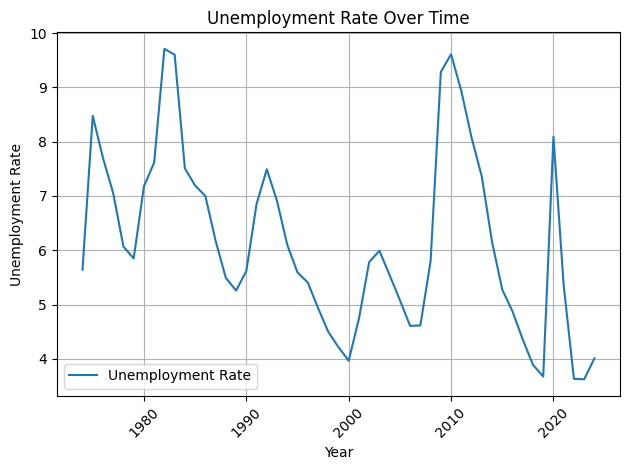

In [338]:
plt.plot(BLS_Data_Frame['Year'], BLS_Data_Frame['Unemployment Rate'], label='Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

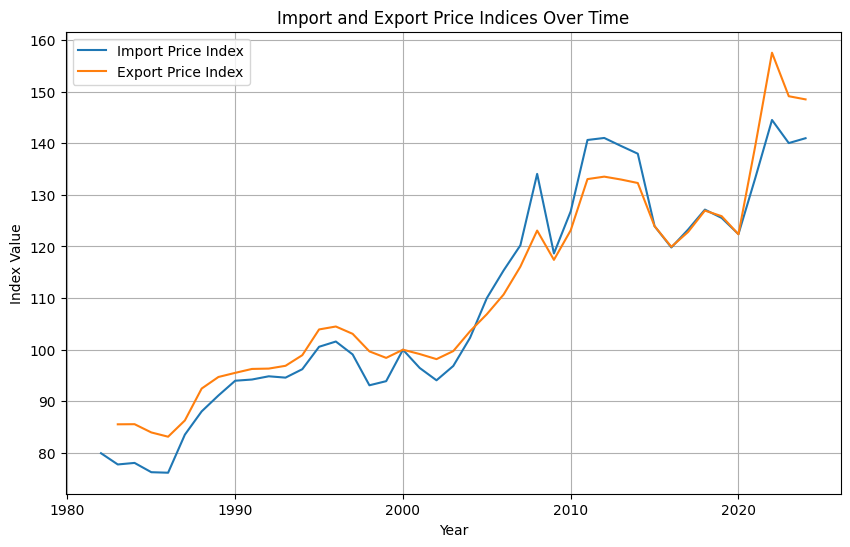

In [339]:
plt.figure(figsize=(10, 6))
plt.plot(BLS_Data_Frame['Year'], BLS_Data_Frame['Import Price Index'], label='Import Price Index')
plt.plot(BLS_Data_Frame['Year'], BLS_Data_Frame['Export Price Index'], label='Export Price Index')
plt.title('Import and Export Price Indices Over Time')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend()

##Question Two: Define Your Problem and Question Three: Justifying Your Problem

My predictive analytics problem largely surrounds this main question that I have drafted:

**Is it possible to successfully predict the annual unemployment rate using economic indicators such as employment levels, labor productivity, average hourly earnings, and price indices as provided by historical BLS data?**

The problem above will be analyzed through a number of differnt ways, but first I must describe the response and predictor variables. Note that I am aiming to predict the unemployment rate **annually** not on a month-by-month basis as the original data varies either monthly or quarterly.

The **response variable** is the **Unemployment Rate Annual Average** or the percentage of unemployed people in the labor force annually.

The **predictor variables** are the **annual averages** of the **Employment Level, Labor Productivity, Average Weekly Hours of Employees, Average Hourly Earnings, Consumer Price Index (CPI), Unit Labor Costs, CPI-W,PPI Commodity Data for Final Demand, Employment Cost Index,  and Wages and Salaries**

I am going to create a regression model using the outlined response and predictor variables. Thus, I would be able to understand the relative importance of each variables on the unemployment rate.

To note, the correlation matrix of all the variables in the BLS_Data_Frame shows that there is lower correlation between the unemployment rate and certain selected predictor variables. However, that does not mean that there is not a relationship between the two. Recall that the correlation matrix only shows a linear relationship  between variables, meaning they can miss non-linear patterns, and importantly, correlation does not imply causation. Just as two variables are highly correlated does not mean one causes the other, potentially leading to incorrect interpretations of the data. This is why it is important to run vasrious types of models that we went over in this course.

Alas, there are plenty of other factors that are outside the BLS dataframe model that are equally as instrumental in predicting the unemployment rate including GDP growth, inflation rate, labor force participation, job openings, initial jobless claims, consumer and business confidence, technological changes, government policies, industry trends, demographic factors like age distribution, and global economic conditions. Essentially, any variable that effects the overall health of the economy will also effect unemployment as it is a vital indicator of a country's economic status.

Before I begin, I would like to elaborate on some Exploratory Data Analysis dilemmas to remember prior to running any types of regressions. Typically, employment levels and average weekly hours show a strong inverse correlation with the unemployment rate. This is largely due to labor demand, cost-cutting measures, and the business cycle impact. The fact that when the economy is strong and job demand is high, more people are employed, and existing employees may work longer hours. On the inverse, during a weak economy with high unemployment, employers are more likely to reduce hours worked by current employees before resorting to layoffs, leading to a decrease in both employment levels and average weekly hours. Additionally, CPI and labor productivity exhibit lagged effects, suggesting potential delayed impacts on unemployment. Unemployment traditionally follows growth with a delay, so naturally consumer price indices and labor productivity will fall behind. Lastly, sudden increases in unit labor costs tend to precede spikes in unemployment. As costs to create a product increases, businesses are more likely to decrease their supply of labor, thus leading to higher unemployment.


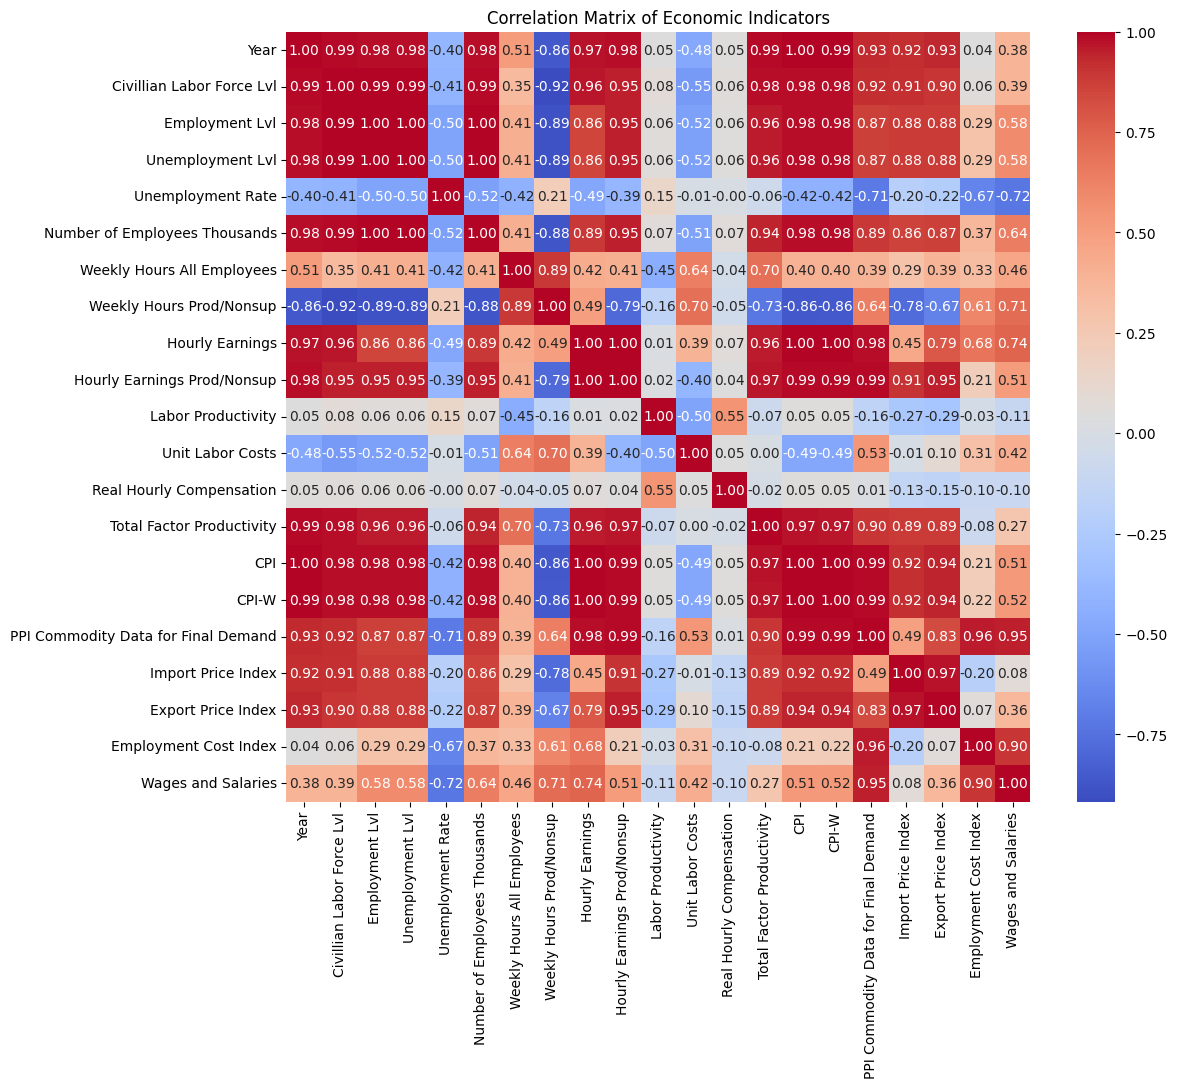

In [340]:
numerical_cols = BLS_Data_Frame.select_dtypes(include=np.number).columns
correlation_matrix = BLS_Data_Frame[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

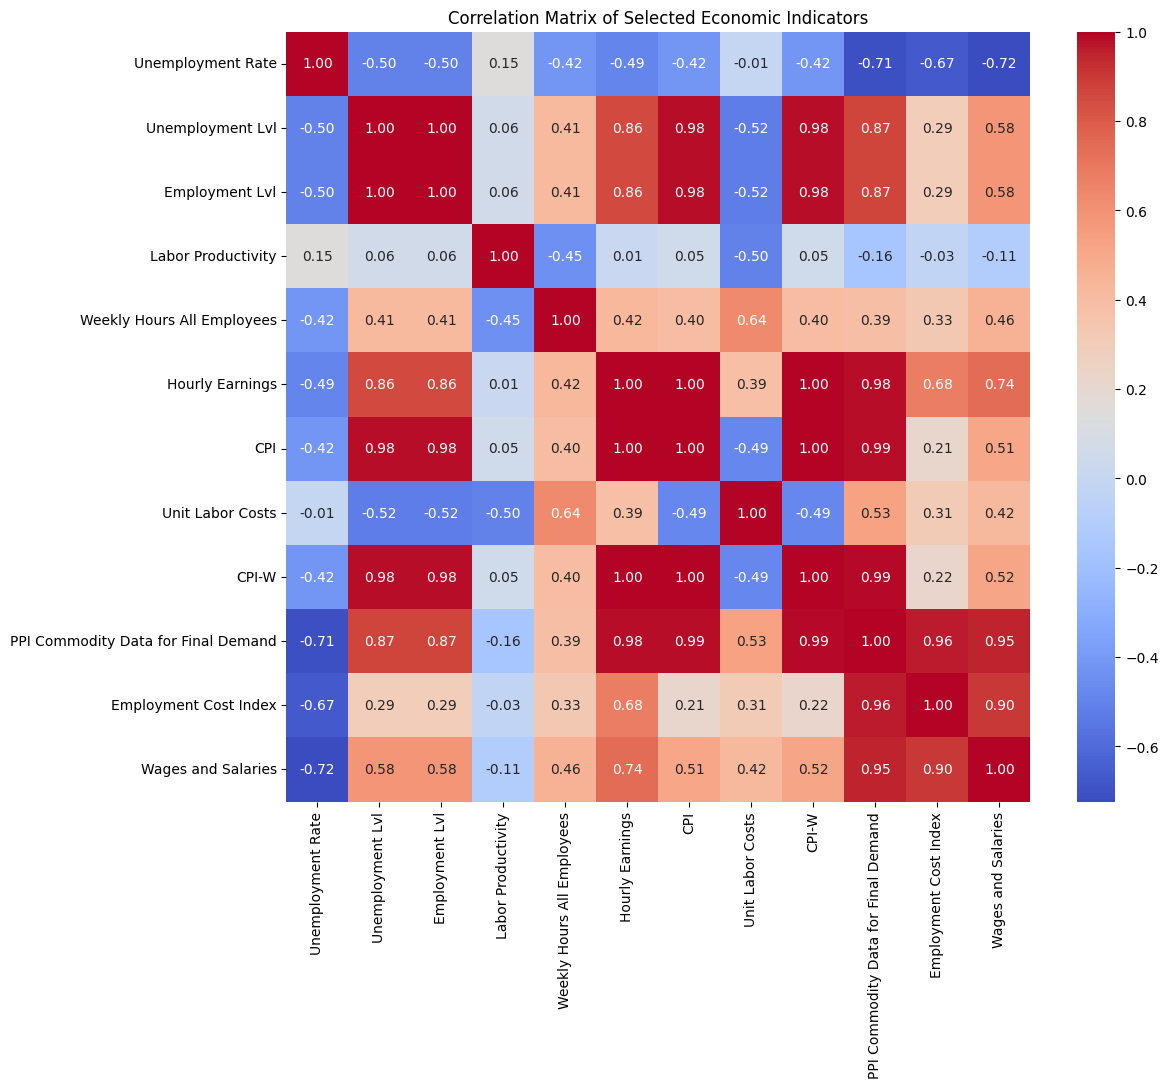

In [341]:
selected_columns = ['Unemployment Rate', 'Unemployment Lvl','Employment Lvl', 'Labor Productivity',
                   'Weekly Hours All Employees', 'Hourly Earnings', 'CPI',
                   'Unit Labor Costs', 'CPI-W','PPI Commodity Data for Final Demand', 'Employment Cost Index',
                    'Wages and Salaries']
correlation_matrix = BLS_Data_Frame[selected_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Economic Indicators')
plt.show()

###Preparing the BLS_Data_Frame for Model Training

In [5]:
response_variable = 'Unemployment Rate'
predictor_variables = ['Unemployment Lvl','Employment Lvl', 'Labor Productivity',
                   'Weekly Hours All Employees', 'Hourly Earnings', 'CPI',
                   'Unit Labor Costs', 'CPI-W','PPI Commodity Data for Final Demand', 'Employment Cost Index', 'Wages and Salaries']
X = BLS_Data_Frame[predictor_variables].dropna()
y = BLS_Data_Frame[response_variable][X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X

,Unemployment Lvl,Employment Lvl,Labor Productivity,Weekly Hours All Employees,Hourly Earnings,CPI,Unit Labor Costs,CPI-W,PPI Commodity Data for Final Demand,Employment Cost Index,Wages and Salaries
35,139893.916667,139893.916667,6.550000,33.850000,22.170000,219.235000,-4.900000,212.125667,100.250000,1.700000,1.575000
36,139077.166667,139077.166667,1.400000,34.141667,22.581667,221.336500,-0.200000,214.834750,101.800000,1.875000,1.625000
37,139885.166667,139885.166667,-0.375000,34.366667,23.033333,225.007500,0.950000,218.460833,105.725000,2.050000,1.650000
38,142474.583333,142474.583333,0.350000,34.416667,23.467500,229.755167,5.300000,223.114250,107.675000,1.850000,1.800000
39,143940.666667,143940.666667,1.950000,34.433333,23.961667,233.805917,-2.075000,226.997083,109.133333,1.925000,1.875000
40,146318.666667,146318.666667,0.350000,34.500000,24.459167,237.896750,2.850000,230.799083,110.891667,2.050000,2.025000
41,148844.666667,148844.666667,0.750000,34.516667,25.009167,242.246500,1.775000,234.827083,109.916667,2.150000,2.300000
42,151436.416667,151436.416667,1.500000,34.400000,25.652500,247.602333,0.400000,239.836917,110.400000,2.175000,2.325000
43,153334.583333,153334.583333,1.775000,34.383333,26.306667,252.169333,2.500000,243.984750,112.958333,2.475000,2.600000
44,155763.000000,155763.000000,0.500000,34.483333,27.103333,257.565083,2.000000,249.188667,116.233333,2.800000,3.000000


In [7]:
print("Predictor Variables in X:", X.columns)
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Predictor Variables in X: Index(['Unemployment Lvl', 'Employment Lvl', 'Labor Productivity',
       'Weekly Hours All Employees', 'Hourly Earnings', 'CPI',
       'Unit Labor Costs', 'CPI-W', 'PPI Commodity Data for Final Demand',
       'Employment Cost Index', 'Wages and Salaries'],
      dtype='object')
Training Features Shape: (12, 11)
Testing Features Shape: (4, 11)


In [8]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

##Regression Problem Exploration

####Small OLS Regression

Now for hypothesis testing which statistically evaluates relationships between predictors and each response variable. This is used prior to training data in order to determine variables' statistical significance via p-values.  A low p-value indicates a predictor is significantly associated with the response variable.

In [21]:
BLS_Data_Frame.dropna(subset=predictor_variables + [response_variable], inplace=True)

In [22]:
BLS_Data_Frame.fillna(BLS_Data_Frame.mean(), inplace=True)

In [23]:
import statsmodels.api as sm
X = BLS_Data_Frame[predictor_variables]
X = sm.add_constant(X)
y = BLS_Data_Frame[response_variable]
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     107.8
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.36e-05
Time:                        21:20:34   Log-Likelihood:                 8.1859
No. Observations:                  16   AIC:                             5.628
Df Residuals:                       5   BIC:                             14.13
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


####Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rfr_feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
rfr_feature_importance.sort_values(ascending=False, inplace=True)
print("Random Forest Regression Feature Importance")
rfr_feature_importance

Random Forest Regression Feature Importance


,0
Unemployment Lvl,0.284225
Employment Lvl,0.277892
CPI-W,0.090673
Labor Productivity,0.061958
PPI Commodity Data for Final Demand,0.058909
Hourly Earnings,0.057783
Employment Cost Index,0.050024
Wages and Salaries,0.040865
Unit Labor Costs,0.033438
CPI,0.032436


In [25]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 1.0629513888888873
Root Mean Squared Error (RMSE): 1.0309953389268485


The random forest regression shows variable importance as variables with strong predictors might serve as robust response variables to predicting the average annual unemployment rate. The "feature importance" refers to a score assigned to each feature in the dataset, indicating how much each feature contributes to the model's prediction. This also helps determine feature selection and potentially model interpretation when examingin mean squared and mean absolute error.

####Decision Tree Regression


In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 1.0629513888888873
Root Mean Squared Error (RMSE): 1.0309953389268485


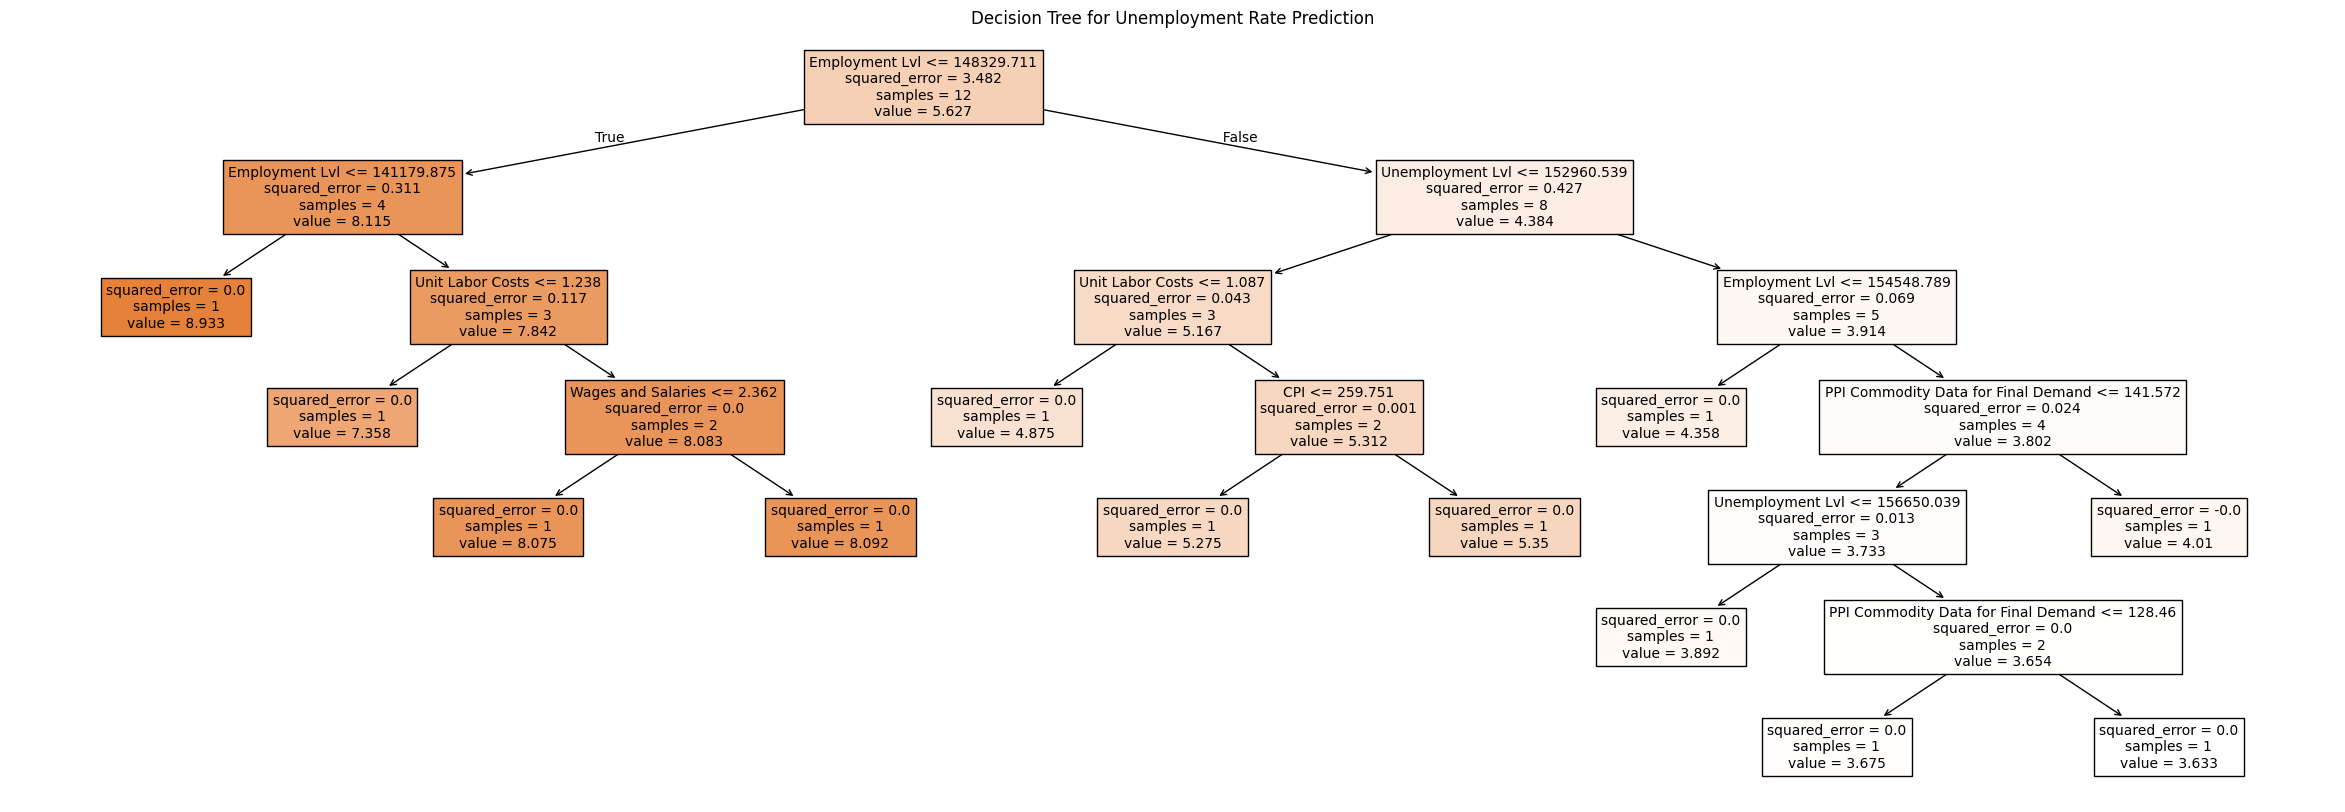

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(tree_model, filled=True, feature_names=predictor_variables, fontsize=10)
plt.title("Decision Tree for Unemployment Rate Prediction")
plt.show()

In [29]:
dtr_feature_importance = pd.Series(tree_model.feature_importances_, index=X_train.columns)
dtr_feature_importance.sort_values(ascending=False, inplace=True)
print("Decision Tree Regression Feature Importance")
dtr_feature_importance

Decision Tree Regression Feature Importance


,0
Employment Lvl,0.915741
Unemployment Lvl,0.071353
Unit Labor Costs,0.011440
PPI Commodity Data for Final Demand,0.001395
CPI,0.000067
Wages and Salaries,0.000003
Labor Productivity,0.000000
Weekly Hours All Employees,0.000000
Hourly Earnings,0.000000
CPI-W,0.000000


Recall that a decision tree visually represents a series of potential decisions and their corresponding outcomes, essentially mapping out different paths to reach a final conclusion, allowing you to analyze and compare various choices based on specific conditions to identify the best course of action in a given situation; it essentially tells you which decisions to make based on different factors and what the likely results of those decisions will be. In this case it breaks down the data into manageable parts, allowing me to decide

####Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
print("Gradient Boosting RMSE:", rmse_gb)
print(f"Gradient Boosting Cross-Validation RMSE Scores: {-cv_scores_gb}")
print(f"Mean Cross-Validation RMSE: {-cv_scores_gb.mean()}")

Gradient Boosting RMSE: 1.0742399551912516
Gradient Boosting Cross-Validation RMSE Scores: [3.14803736 0.86094702 0.38893539 1.11975307 3.1666176 ]
Mean Cross-Validation RMSE: 1.736858088192252


In [32]:
gbr_feature_importance = gb_model.feature_importances_
gbr_feature_importance = pd.Series(gbr_feature_importance, index=X_train.columns)
gbr_feature_importance.sort_values(ascending=False, inplace=True)
print("Gradient Boosting Feature Importance")
print(gbr_feature_importance)

Gradient Boosting Feature Importance
Unemployment Lvl                       0.672515
Employment Lvl                         0.292838
Weekly Hours All Employees             0.013589
Unit Labor Costs                       0.009199
Wages and Salaries                     0.005075
Hourly Earnings                        0.002924
Labor Productivity                     0.001964
CPI                                    0.001232
PPI Commodity Data for Final Demand    0.000458
CPI-W                                  0.000119
Employment Cost Index                  0.000087
dtype: float64


####Support Vector Regression (SVR)

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
cv_scores_svr = cross_val_score(svr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
print("Support Vector Regression RMSE:", rmse_svr)
print(f"Support Vector Regression Cross-Validation RMSE Scores: {-cv_scores_svr}")
print(f"Mean Cross-Validation RMSE: {-cv_scores_svr.mean()}")

Support Vector Regression RMSE: 2520.6683228043194
Support Vector Regression Cross-Validation RMSE Scores: [9692.06825165 1531.03027824  426.74777916 2491.05282578 1327.42240262]
Mean Cross-Validation RMSE: 3093.664307490852


In [35]:
selector = RFE(svr_model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]

In [36]:
print("Selected Features (RFE with SVR):")
print(selected_features)

Selected Features (RFE with SVR):
Index(['Labor Productivity', 'Hourly Earnings', 'CPI', 'CPI-W',
       'Wages and Salaries'],
      dtype='object')


### Secondary Retraining of Models

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
BLS_Data_Frame_imputed = imputer.fit_transform(BLS_Data_Frame)
selected_features = ['Unemployment Lvl', 'Employment Lvl', 'Employment Cost Index', 'CPI','CPI-W', 'Wages and Salaries', 'Labor Productivity', 'Hourly Earnings']
X_selected = BLS_Data_Frame[selected_features]
y = BLS_Data_Frame['Unemployment Rate']
second_X_train, second_X_test, second_y_train, second_y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
second_X_train = pd.DataFrame(imputer.fit_transform(second_X_train), columns=second_X_train.columns, index=second_X_train.index)
second_X_test = pd.DataFrame(imputer.transform(second_X_test), columns=second_X_test.columns, index=second_X_test.index)

##### Second Random Forest Regression

In [38]:
second_rf_model = RandomForestRegressor(random_state=42)
second_rf_model.fit(second_X_train, second_y_train)
y_pred_rf = second_rf_model.predict(second_X_test)
print(f"Random Forest RMSE: {mean_squared_error(second_y_test, y_pred_rf, squared=False):.4f}")

Random Forest RMSE: 1.0529


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
second_feature_importance_rf = second_rf_model.feature_importances_
second_feature_importance_rf = pd.Series(second_feature_importance_rf, index=second_X_train.columns)
second_feature_importance_rf.sort_values(ascending=False, inplace=True)
print("Second Random Forest Regression Feature Importance")
print(second_feature_importance_rf)

Second Random Forest Regression Feature Importance
Employment Lvl           0.382049
Unemployment Lvl         0.241518
CPI-W                    0.088752
Employment Cost Index    0.076904
Hourly Earnings          0.067553
Wages and Salaries       0.052371
Labor Productivity       0.050469
CPI                      0.040384
dtype: float64


##### Second Decision Tree Regression

In [40]:
second_dt_model = DecisionTreeRegressor(random_state=42)
second_dt_model.fit(second_X_train, second_y_train)
y_pred_dt = second_dt_model.predict(second_X_test)
print(f"Decision Tree RMSE: {mean_squared_error(second_y_test, y_pred_dt, squared=False):.4f}")

Decision Tree RMSE: 0.7359


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


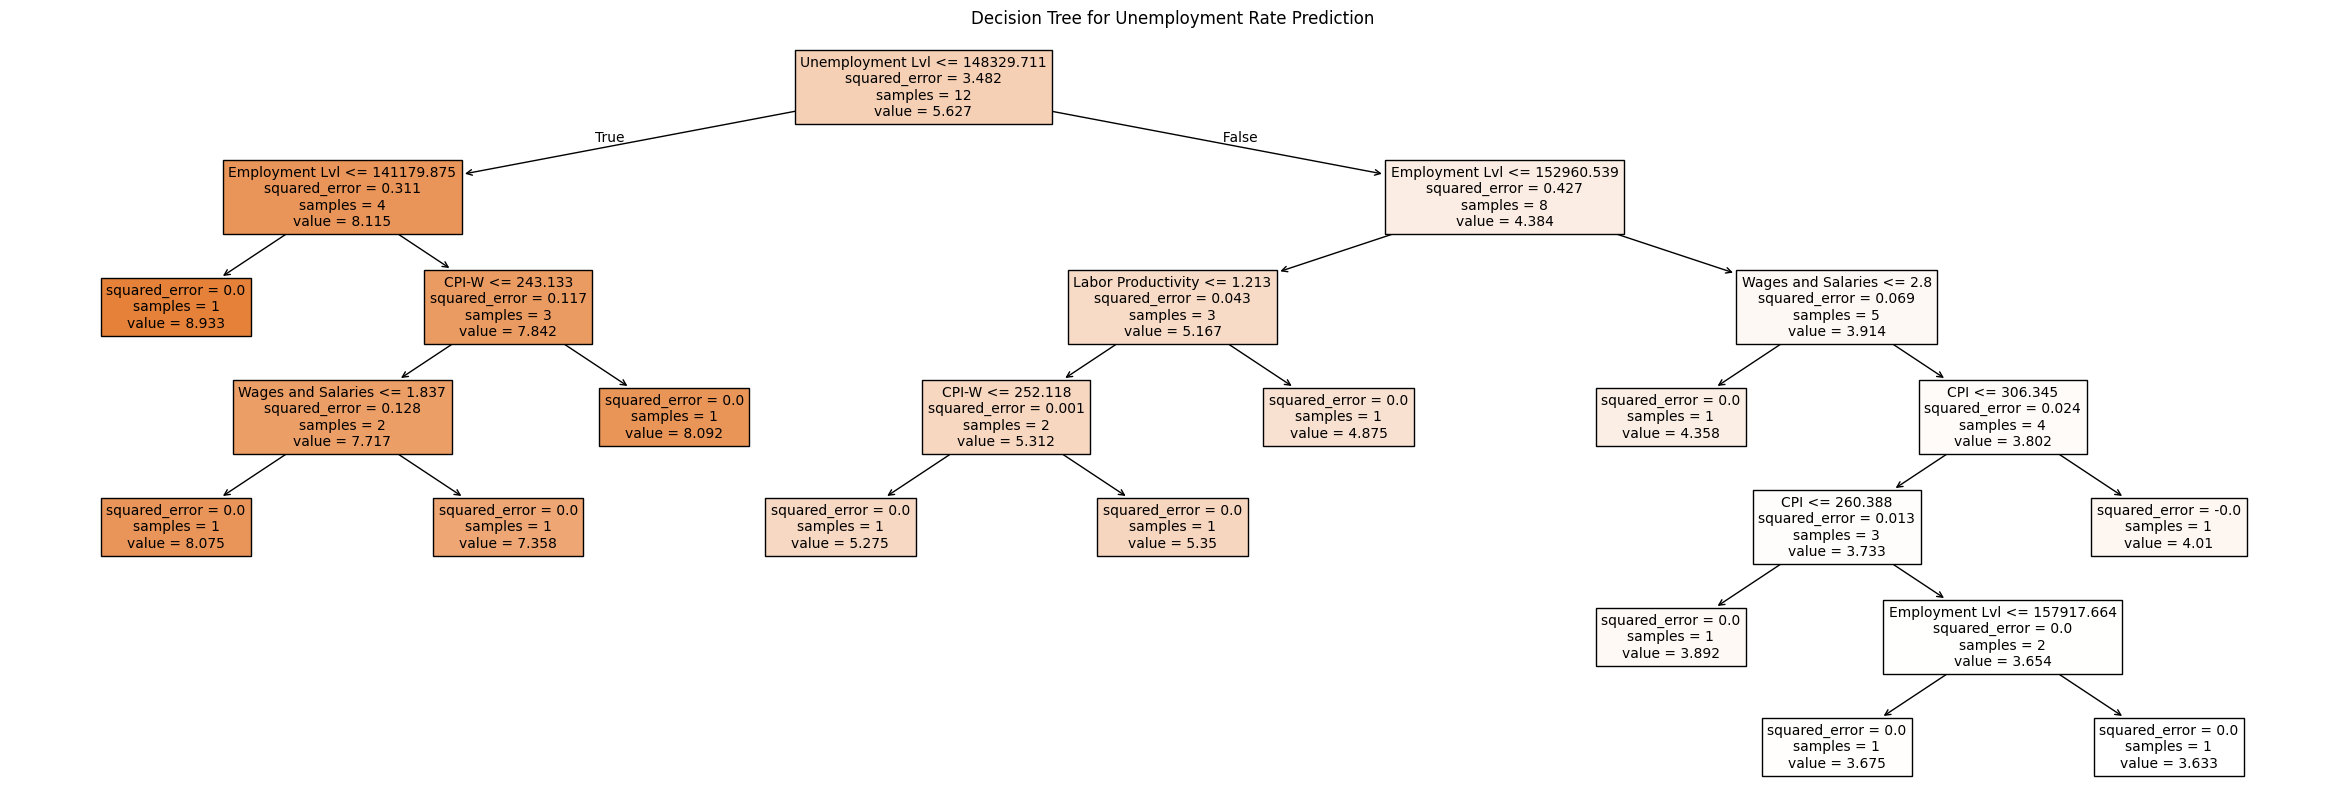

In [41]:
plt.figure(figsize=(30, 10))
plot_tree(second_dt_model, filled=True, feature_names=selected_features, fontsize=10)
plt.title("Decision Tree for Unemployment Rate Prediction")
plt.show()

In [42]:
second_feature_importance_dt = second_dt_model.feature_importances_
second_feature_importance_dt= pd.Series(second_feature_importance_dt, index=second_X_train.columns)
second_feature_importance_dt.sort_values(ascending=False, inplace=True)
print("Second Decision Tree Regression Feature Importance")
print(second_feature_importance_dt)

Second Decision Tree Regression Feature Importance
Unemployment Lvl         0.888435
Employment Lvl           0.091865
Wages and Salaries       0.012061
Labor Productivity       0.003054
CPI-W                    0.002311
CPI                      0.002274
Employment Cost Index    0.000000
Hourly Earnings          0.000000
dtype: float64


#####Second Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
second_gb_model = GradientBoostingRegressor(random_state=42)
second_gb_model.fit(second_X_train, second_y_train)
y_pred_gb = second_gb_model.predict(second_X_test)
print(f"Gradient Boosting RMSE: {mean_squared_error(second_y_test, y_pred_gb, squared=False):.4f}")

Gradient Boosting RMSE: 1.3375


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
second_feature_importance_gb = second_gb_model.feature_importances_
second_feature_importance_gb = pd.Series(second_feature_importance_gb, index=second_X_train.columns)
second_feature_importance_gb.sort_values(ascending=False, inplace=True)
print("Second Gradient Boosting Feature Importance")
print(second_feature_importance_gb)

Second Gradient Boosting Feature Importance
Unemployment Lvl         0.768475
Employment Lvl           0.202761
Employment Cost Index    0.007643
CPI-W                    0.006804
Labor Productivity       0.006166
Wages and Salaries       0.005052
CPI                      0.001581
Hourly Earnings          0.001517
dtype: float64


##### Second Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(second_X_train, second_y_train)
y_pred_lr = lr_model.predict(second_X_test)
print(f"Linear Regression RMSE: {mean_squared_error(second_y_test, y_pred_lr, squared=False):.4f}")

Linear Regression RMSE: 0.3045


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#####Second Support Vector Regression

In [46]:
from sklearn.svm import SVR
second_svr_model = SVR(kernel='linear')
second_svr_model.fit(second_X_train, second_y_train)
y_pred_svr = second_svr_model.predict(second_X_test)
print(f"Support Vector Regression RMSE: {mean_squared_error(second_y_test, y_pred_svr, squared=False):.4f}")

Support Vector Regression RMSE: 4513.8154


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
second_feature_importance_svr = second_svr_model.coef_[0]
second_feature_importance_svr = pd.Series(second_feature_importance_svr, index=second_X_train.columns)
second_feature_importance_svr.sort_values(ascending=False, inplace=True)
print("Second Support Vector Regression Feature Importance")
print(second_feature_importance_svr)

Second Support Vector Regression Feature Importance
CPI                      10.914498
CPI-W                     9.166965
Labor Productivity        2.256495
Hourly Earnings           0.816201
Unemployment Lvl          0.133116
Employment Lvl            0.133116
Employment Cost Index    -0.907116
Wages and Salaries       -1.925883
dtype: float64


##Model Evaluation

In [48]:
second_X_train, second_X_test, second_y_train, second_y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

###OLS

In [50]:
import statsmodels.api as sm
ols_model = sm.OLS(second_y_train, second_X_train).fit()
print(ols_model.summary())
y_pred = ols_model.predict(second_X_test)
ols_test_mse = ((y_pred - second_y_test) ** 2).mean()
print(f'Test MSE: {ols_test_mse}')

                                 OLS Regression Results                                
Dep. Variable:      Unemployment Rate   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              62.53
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                    0.000144
Time:                        21:20:58   Log-Likelihood:                         -11.483
No. Observations:                  12   AIC:                                      36.97
Df Residuals:                       5   BIC:                                      40.36
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [51]:
ols_test_mse = ((y_pred - second_y_test) ** 2).mean()
print(f'Test MSE: {ols_test_mse}')

Test MSE: 0.8593126931534005


###Best Subset Selection

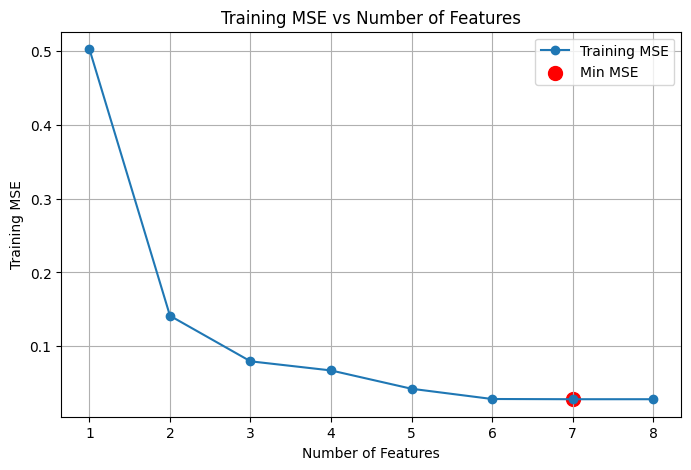

In [52]:
import itertools
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
oldxs = []
xcombo = []
coef = []
mse = []
ssr = []
err = []

remainx = second_X_train.copy()
p = second_X_train.shape[1]

for i in range(1, p + 1):

    best_ssr = np.inf

    for combo in itertools.combinations(remainx.columns, 1):
        tempx = sm.add_constant(second_X_train[oldxs + list(combo)])
        lm = sm.OLS(second_y_train, tempx).fit()

        if lm.ssr < best_ssr:
            addx = list(combo)[0]
            best_coef = lm.params.tolist()
            best_mse = ((lm.predict(tempx) - second_y_train) ** 2).mean()
            best_ssr = lm.ssr
            temp_xtest = sm.add_constant(second_X_test[tempx.columns[1:]])
            test_mse = ((lm.predict(temp_xtest) - second_y_test) ** 2).mean()

    oldxs.append(addx)
    remainx = remainx.drop(columns=[addx])

    xcombo.append(oldxs.copy())
    coef.append(best_coef)
    mse.append(best_mse)
    ssr.append(best_ssr)
    err.append(test_mse)

results = pd.DataFrame({'xnum': range(1, p + 1),'xcombo': xcombo,'coef': coef,'Training MSE': mse, 'RSS': ssr,'Test MSE': err})

plt.figure(figsize=(8, 5))
plt.plot(results['xnum'], results['Training MSE'], marker='o', label='Training MSE')
plt.scatter(results['Training MSE'].idxmin() + 1, results['Training MSE'].min(), s=100, c='red', label='Min MSE')
plt.xlabel('Number of Features')
plt.ylabel('Training MSE')
plt.title('Training MSE vs Number of Features')
plt.legend()
plt.grid()
plt.show()

In [53]:
print("Best Subset Selection Results:")
print(results)

Best Subset Selection Results:
   xnum                                             xcombo  \
0     1                                 [Unemployment Lvl]   
1     2                [Unemployment Lvl, Hourly Earnings]   
2     3  [Unemployment Lvl, Hourly Earnings, Wages and ...   
3     4  [Unemployment Lvl, Hourly Earnings, Wages and ...   
4     5  [Unemployment Lvl, Hourly Earnings, Wages and ...   
5     6  [Unemployment Lvl, Hourly Earnings, Wages and ...   
6     7  [Unemployment Lvl, Hourly Earnings, Wages and ...   
7     8  [Unemployment Lvl, Hourly Earnings, Wages and ...   

                                                coef  Training MSE       RSS  \
0       [46.25555094010272, -0.00026887517447993686]      0.502762  6.033148   
1  [58.119516031472386, -0.0004004655792457832, 0...      0.141225  1.694701   
2  [53.956875246068655, -0.00038615876534925646, ...      0.079456  0.953475   
3  [55.10354066939814, -0.00038829262097189043, 0...      0.067077  0.804929   
4  [55.938

In [56]:
results.xcombo.iloc[6]

['Unemployment Lvl',
 'Hourly Earnings',
 'Wages and Salaries',
 'Labor Productivity',
 'Employment Cost Index',
 'CPI-W',
 'CPI']

In [58]:
best_subset_test_mse = results['Test MSE'].iloc[6]
best_subset_test_mse

0.09272047183730901

###Ridge Model

In [59]:
from sklearn.linear_model import RidgeCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-4, 0, 100)
ridgecv = RidgeCV(alphas=alphas, store_cv_values=True)
ridgecv.fit(second_X_train, second_y_train)
print(f"Best alpha selected by RidgeCV: {ridgecv.alpha_}")
y_pred_test = ridgecv.predict(second_X_test)
ridge_test_mse = mean_squared_error(second_y_test, y_pred_test)
print(f"Ridge Test MSE: {ridge_test_mse}")

Best alpha selected by RidgeCV: 1.0
Ridge Test MSE: 0.1260769549834237


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2339: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


### Lasso

In [61]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-4, 0, 100)
lassocv = LassoCV(alphas=alphas, cv=5, random_state=42)
lassocv.fit(second_X_train, second_y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06361210123148381, tolerance: 0.003005340061728396
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20421384103985726, tolerance: 0.003005340061728396
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2067793530910934, tolerance: 0.003005340061728396
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: 

LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=5, random_state=42)

In [62]:
print(f"Best alpha selected by LassoCV: {lassocv.alpha_}")
y_pred_test = lassocv.predict(second_X_test)
lasso_test_mse = mean_squared_error(second_y_test, y_pred_test)
print(f"Lasso Test MSE: {lasso_test_mse}")

Best alpha selected by LassoCV: 0.018307382802953697
Lasso Test MSE: 0.1317635355087484


### PCR

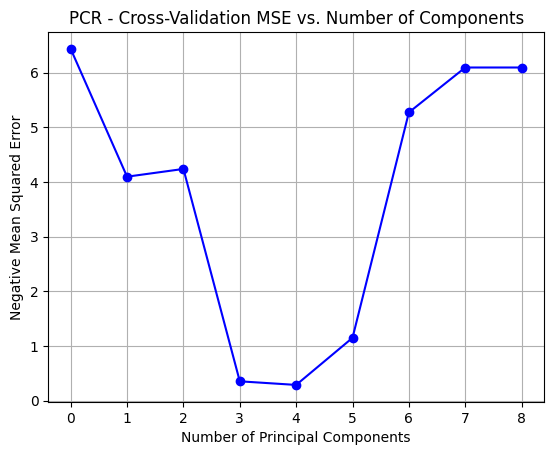

Minimum MSE: 0.287631415514055 at 4 components


In [64]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

scores = []
scores.append(-np.mean(cross_val_score(LinearRegression(), np.ones((X_selected.shape[0], 1)), y, cv=5, scoring='neg_mean_squared_error')))
for i in np.arange(1, X_selected.shape[1] + 1):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)
    pca = PCA(n_components=i)
    X_pcr = pca.fit_transform(X_scaled)
    score = -np.mean(cross_val_score(LinearRegression(), X_pcr, y, cv=5, scoring='neg_mean_squared_error'))
    scores.append(score)

plt.plot(np.arange(0, X_selected.shape[1] + 1), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Negative Mean Squared Error')
plt.title('PCR - Cross-Validation MSE vs. Number of Components')
plt.grid(True)
plt.show()


pcr_min_mse = min(scores)
optimal_components = np.argmin(scores)
print(f"Minimum MSE: {pcr_min_mse} at {optimal_components} components")


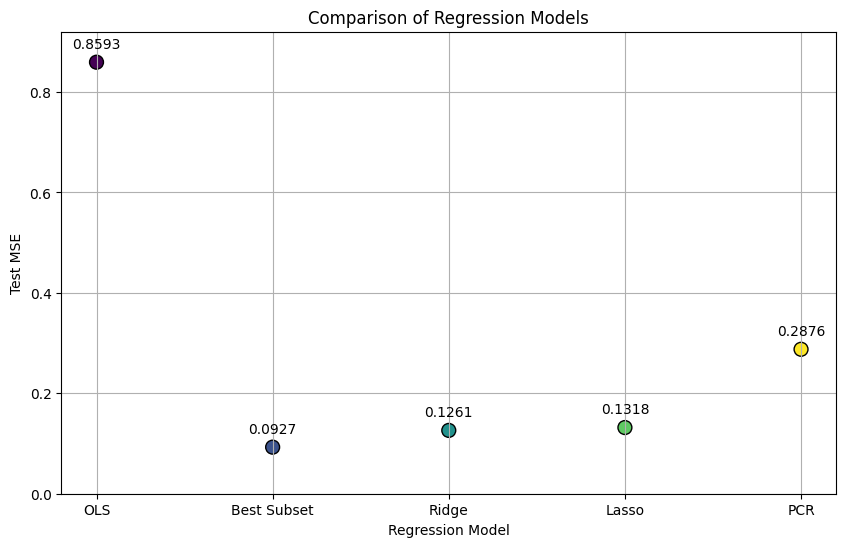

In [71]:
mse_values = {
    'OLS': ols_test_mse,
    'Best Subset': best_subset_test_mse,
    'Ridge': ridge_test_mse,
    'Lasso': lasso_test_mse,
    'PCR': pcr_min_mse}
models = list(mse_values.keys())
mse = list(mse_values.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(mse)))
plt.figure(figsize=(10, 6))
scatter = plt.scatter(models, mse, c=colors, s=100, edgecolor='k')
for i, txt in enumerate(mse):
    plt.annotate(f'{txt:.4f}',
                 (models[i], mse[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center',
                 fontsize=10,)
plt.ylim(0,0.92)
plt.xlabel('Regression Model')
plt.ylabel('Test MSE')
plt.title('Comparison of Regression Models')
plt.grid(True)
plt.show()


#Extra Exploration

##Classification Models Exploration
The classification models that I am examining will help me gain insight, especially if I can categorize unemployment data into different groups or classes based on specific criteria. Then I can apply it to classification models like logitic regressions, random forest classfier, etc.

In [ ]:
def categorize_unemployment(rate):
    if rate < 4:
        return "Low"
    elif rate <= 7:
        return "Moderate"
    else:
        return "High"

BLS_Data_Frame['Unemployment_Category'] = BLS_Data_Frame['Unemployment Rate'].apply(categorize_unemployment)


In [ ]:
predictor_variables = ['Unemployment Lvl','Employment Lvl', 'Labor Productivity', 'Weekly Hours All Employees',
                     'Hourly Earnings', 'CPI', 'Unit Labor Costs', 'CPI-W',
                     'PPI Commodity Data for Final Demand', 'Employment Cost Index',
                     'Wages and Salaries']
X = BLS_Data_Frame[predictor_variables]
y = BLS_Data_Frame['Unemployment_Category']

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Logistic Regression

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_imputed, y_train)
y_pred_log = log_reg.predict(X_test_imputed)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

In [ ]:
feature_importance_log = log_reg.coef_[0]
feature_importance_log = pd.Series(feature_importance_log, index=X_train.columns)
feature_importance_log.sort_values(ascending=False, inplace=True)
feature_importance_log

####Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

In [ ]:
feature_importance_dt = dt_classifier.feature_importances_
feature_importance_dt = pd.Series(feature_importance_dt, index=X_train.columns)
feature_importance_dt.sort_values(ascending=False, inplace=True)
feature_importance_dt

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, filled=True, feature_names=predictor_variables, fontsize=10)
plt.title("Decision Tree for Unemployment Rate Prediction")
plt.show()

####Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf))

In [ ]:
feature_importance_rf = rf_classifier.feature_importances_
feature_importance_rf = pd.Series(feature_importance_rf, index=X_train.columns)
feature_importance_rf.sort_values(ascending=False, inplace=True)
feature_importance_rf

####Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_imputed, y_train)
y_pred_svc = svc.predict(X_test_imputed)
print("Support Vector Classification Report:")
print(classification_report(y_test, y_pred_svc))

In [ ]:
feature_importance_svc = svc.coef_[0]
feature_importance_svc = pd.Series(feature_importance_svc, index=X_train.columns)
feature_importance_svc.sort_values(ascending=False, inplace=True)
feature_importance_svc

###Secondary Retraining of Classification Models (with Wages and Salaries and Employment Cost Index)

In [ ]:
secondary_predictor_variables = ['Unemployment Lvl', 'Employment Lvl', 'Employment Cost Index', 'CPI','CPI-W', 'Wages and Salaries', 'Labor Productivity']
secondary_X = BLS_Data_Frame[secondary_predictor_variables]
y = BLS_Data_Frame['Unemployment_Category']
secondary_X_train, secondary_X_test, secondary_y_train, secondary_y_test = train_test_split(secondary_X, y, test_size=0.2, random_state=42)

In [ ]:
y

In [ ]:
secondary_X

####Logistic Regression

In [ ]:
imputer = SimpleImputer(strategy='mean')
secondary_X_train_imputed = imputer.fit_transform(secondary_X_train)
secondary_X_test_imputed = imputer.transform(secondary_X_test)
secondary_log_reg = LogisticRegression(max_iter=1000)
secondary_log_reg.fit(secondary_X_train_imputed, secondary_y_train)
y_pred_log = secondary_log_reg.predict(secondary_X_test_imputed)
print("Logistic Regression Classification Report:")
print(classification_report(secondary_y_test, y_pred_log))

In [ ]:
feature_importance_secondary_log = secondary_log_reg.coef_[0]
feature_importance_secondary_log = pd.Series(feature_importance_secondary_log, index=secondary_X_train.columns)
feature_importance_secondary_log.sort_values(ascending=False, inplace=True)
feature_importance_secondary_log

####Decision Tree Classifier

In [ ]:
secondary_dt = DecisionTreeClassifier(random_state=42)
secondary_dt.fit(secondary_X_train, secondary_y_train)
y_pred_dt = secondary_dt.predict(secondary_X_test)
print("Decision Tree Classification Report:")
print(classification_report(secondary_y_test, y_pred_dt))

In [ ]:
feature_importance_secondary_dt = secondary_dt.feature_importances_
feature_importance_secondary_dt = pd.Series(feature_importance_secondary_dt, index=secondary_X_train.columns)
feature_importance_secondary_dt.sort_values(ascending=False, inplace=True)
feature_importance_secondary_dt

####Random Forest Classifier

In [ ]:
secondary_rf = RandomForestClassifier(random_state=42)
secondary_rf.fit(secondary_X_train, secondary_y_train)
y_pred_rf = secondary_rf.predict(secondary_X_test)
print("Random Forest Classification Report:")
print(classification_report(secondary_y_test, y_pred_rf))

In [ ]:
feature_importance_secondary_rf = secondary_rf.feature_importances_
feature_importance_secondary_rf = pd.Series(feature_importance_secondary_rf, index=secondary_X_train.columns)
feature_importance_secondary_rf.sort_values(ascending=False, inplace=True)
feature_importance_secondary_rf

####Support Vector Classifier

In [ ]:
secondary_svc = SVC(kernel='linear')
secondary_svc.fit(secondary_X_train_imputed, secondary_y_train)
y_pred_svc = secondary_svc.predict(secondary_X_test_imputed)
print("Support Vector Classification Report:")
print(classification_report(secondary_y_test, y_pred_svc))

###Secondary Retraining of Classification Models (without Wages and Salaries and Employment Cost Index)

In [ ]:
secondary_predictor_variables_omitted = ['Unemployment Lvl', 'Employment Lvl', 'CPI','CPI-W', 'Labor Productivity']
secondary_omitted_X = BLS_Data_Frame[secondary_predictor_variables_omitted]
y = BLS_Data_Frame['Unemployment_Category']
secondary_omitted_X_train, secondary_omitted_X_test, secondary_omitted_y_train, secondary_omitted_y_test = train_test_split(secondary_omitted_X, y, test_size=0.2, random_state=42)

In [ ]:
secondary_omitted_X

In [ ]:
BLS_Data_Frame[['Year', 'Unemployment Rate'] + [y.name] + list(secondary_omitted_X.columns)]

####Logistic Regression

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
imputer = SimpleImputer(strategy='mean')
secondary_omitted_X_train_imputed = imputer.fit_transform(secondary_omitted_X_train)
secondary_omitted_X_test_imputed = imputer.transform(secondary_omitted_X_test)
secondary_omitted_log_reg = LogisticRegression(max_iter=1000)
secondary_omitted_log_reg.fit(secondary_omitted_X_train_imputed, secondary_omitted_y_train)
y_pred_log = secondary_omitted_log_reg.predict(secondary_omitted_X_test_imputed)
print("Logistic Regression Classification Report:")
print(classification_report(secondary_omitted_y_test, y_pred_log))

In [ ]:
feature_importance_secondary_log = secondary_omitted_log_reg.coef_[0]
feature_importance_secondary_log = pd.Series(feature_importance_secondary_log, index=secondary_omitted_X_train.columns)
feature_importance_secondary_log.sort_values(ascending=False, inplace=True)
feature_importance_secondary_log

####Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
secondary_omitted_dt = DecisionTreeClassifier(random_state=42)
secondary_omitted_dt.fit(secondary_omitted_X_train, secondary_omitted_y_train)
y_pred_dt = secondary_omitted_dt.predict(secondary_omitted_X_test)
print("Decision Tree Classification Report:")
print(classification_report(secondary_omitted_y_test, y_pred_dt))

In [ ]:
feature_importance_secondary_dt = secondary_omitted_dt.feature_importances_
feature_importance_secondary_dt = pd.Series(feature_importance_secondary_dt, index=secondary_omitted_X_train.columns)
feature_importance_secondary_dt.sort_values(ascending=False, inplace=True)
feature_importance_secondary_dt

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(secondary_omitted_dt, filled=True, feature_names=secondary_predictor_variables_omitted, fontsize=10)
plt.title("Decision Tree for Unemployment Rate Prediction")

####Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
secondary_omitted_rf = RandomForestClassifier(random_state=42)
secondary_omitted_rf.fit(secondary_omitted_X_train, secondary_omitted_y_train)
y_pred_rf = secondary_omitted_rf.predict(secondary_omitted_X_test)
print("Random Forest Classification Report:")
print(classification_report(secondary_omitted_y_test, y_pred_rf))

In [ ]:
feature_importance_secondary_rf = secondary_omitted_rf.feature_importances_
feature_importance_secondary_rf = pd.Series(feature_importance_secondary_rf, index=secondary_omitted_X_train.columns)
feature_importance_secondary_rf.sort_values(ascending=False, inplace=True)
feature_importance_secondary_rf